# Cryptocurrency Prophet

In [ ]:
!pip install pandas prophet requests ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.5 MB/s 


In [ ]:
#@title Using Python Prophet and CoinCap for crpytocurrency predictions.
#@markdown We will create a list of all the available currencies via CoinCap.<br>
#@markdown We use historical pricing on a 1 day basis as our dataset.

import logging
logging.basicConfig()
logger = logging.getLogger('foo')
logger.setLevel(logging.ERROR)

import sys
from datetime import datetime
from typing import List, Set

import pandas as pd
import requests
from prophet import Prophet


proxies = {
    # 'https': 'https://116.254.116.99:8080'
}

requests.Session().get('https://api.coincap.io/v2/assets', proxies=proxies)

def get_supported_currencies_datasets() -> List[str]:
    try:      
      datasets = requests.Session().get('https://api.coincap.io/v2/assets', proxies=proxies).json()
    except Exception as e:
      print(e)
      print('Failed to get the list of currencies from coincap. Please retry.')
      return
    coins = [f['id'] for f in datasets['data']]
    return coins


def predict_currencies(currencies: Set[str]):
    currencies = [c for c in currencies if c]
    futures = []
    forecasts = []
    for currency_name in currencies:
        print("Forcasting", currency_name)
        # Get the dataset
        try:
          historical_data = requests.Session().get(f'https://api.coincap.io/v2/assets/{currency_name}/history?interval=d1', proxies=proxies).json()[
              'data']
        except Exception:
          print(f'Failed to get the data for {currency_name} from coincap. Please retry.')
          return
        
        df = pd.DataFrame.from_dict(historical_data)

        # Normalization
        print("Normalizing the data...")
        df.rename(columns={"time": "ds", "priceUsd": "y"}, inplace=True)
        # Stripping timezone
        df['ds'] = df['ds'].apply(lambda timestamp: datetime.fromtimestamp(int(timestamp) / 1000))
        df['ds'] = df['ds'].apply(lambda d: d.replace(tzinfo=None))
        df['ds'] = pd.to_datetime(df['ds'])
        df['ds'].dt.tz_localize(None)

        # Fit
        print("Creating a time-series model...")
        m = Prophet(seasonality_mode='multiplicative', daily_seasonality=True, yearly_seasonality=True).fit(df)
        
        # Predictions
        future = m.make_future_dataframe(periods=90, include_history=False)
        forecast = m.predict(future)
        futures.append(future)
        forecasts.append(forecast)
        print(f"Forecast for {currency_name}: ")
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
        forecast_plt = m.plot(forecast)
        forecast_gca = forecast_plt.gca()
        forecast_gca.set_title(f"{currency_name.upper()} Forecast", size=34)
        forecast_plt.show()
        # components_plt = m.plot_components(forecast)
        # components_gca = components_plt.gca()
        # components_gca.set_title(f"{currency_name.upper()} Components", size=34)
        # components_plt.show()

    return forecasts

In [ ]:
#@title Let's list all currencies on CoinCap
#@markdown You can select multiple values.
supported_currencies = get_supported_currencies_datasets()
if supported_currencies:
  import ipywidgets as widgets
  selection = widgets.SelectMultiple(
      options=supported_currencies,
      value=['ethereum'],
      rows=100,
      description='Currencies',
      disabled=False
  )
  display(selection)

SelectMultiple(description='Currencies', index=(1,), options=('bitcoin', 'ethereum', 'tether', 'usd-coin', 'bi…

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/szb4hlhu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/o3olz3ir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87885', 'data', 'file=/tmp/tmpo4q9qsx2/szb4hlhu.json', 'init=/tmp/tmpo4q9qsx2/o3olz3ir.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelfn__vznt/prophet_model-20221121074903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predicting  ('bitcoin', 'ethereum', 'tether', 'usd-coin', 'binance-coin', 'binance-usd', 'xrp', 'cardano', 'dogecoin', 'polygon', 'polkadot', 'multi-collateral-dai', 'terra-luna', 'shiba-inu', 'tron', 'litecoin', 'unus-sed-leo', 'solana', 'uniswap', 'wrapped-bitcoin', 'avalanche', 'chainlink', 'ethereum-classic', 'monero', 'cosmos', 'stellar', 'bitcoin-cash', 'algorand', 'crypto-com-coin', 'filecoin', 'vechain', 'quant', 'near-protocol', 'okb', 'chiliz', 'frax', 'flow', 'internet-computer', 'elrond-egld', 'eos', 'trueusd', 'tezos', 'bitcoin-bep2', 'theta', 'trust-wallet-token', 'the-sandbox', 'aave', 'bitcoin-sv', 'decentraland', 'hedera-hashgraph', 'huobi-token', 'kucoin-token', 'maker', 'gemini-dollar', 'axie-infinity', 'zcash', 'iota', 'pax-gold', 'pancakeswap', 'ecash', 'sonm', 'klaytn', 'ftx-token', 'neo', 'fantom', 'binaryx', 'fei-protocol', 'kava', 'mina', 'nexo', 'the-graph', 'gatetoken', 'dash', 'synthetix-network-token', 'thorchain', 'wemix', 'lido-dao', 'basic-attention-toke

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/dnwdc9av.json


Forecast for bitcoin: 
           ds         yhat   yhat_lower   yhat_upper
85 2023-02-14  4645.026987  2836.647014  6821.425805
86 2023-02-15  4571.845827  2695.605135  6415.657853
87 2023-02-16  4450.197321  2599.590683  6251.624953
88 2023-02-17  4323.497241  2478.224480  6107.789752
89 2023-02-18  4183.492300  2277.102204  5999.289765
Forcasting ethereum
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/g83p7zd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87512', 'data', 'file=/tmp/tmpo4q9qsx2/dnwdc9av.json', 'init=/tmp/tmpo4q9qsx2/g83p7zd4.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelae9_snti/prophet_model-20221121074904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/q_riwxqi.json


Forecast for ethereum: 
           ds        yhat  yhat_lower  yhat_upper
85 2023-02-14  413.863026  234.540018  590.702751
86 2023-02-15  410.645262  249.443200  585.596087
87 2023-02-16  400.946425  237.065110  563.904989
88 2023-02-17  390.105155  214.901284  550.694233
89 2023-02-18  379.194342  211.665779  547.431954
Forcasting tether
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/pz7zpe57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53114', 'data', 'file=/tmp/tmpo4q9qsx2/q_riwxqi.json', 'init=/tmp/tmpo4q9qsx2/pz7zpe57.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelpze8b7bk/prophet_model-20221121074905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/avwwub3b.json


Forecast for tether: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  1.018331    1.009187    1.026572
86 2023-02-15  1.018536    1.009572    1.026964
87 2023-02-16  1.018552    1.008816    1.027086
88 2023-02-17  1.019054    1.009345    1.027831
89 2023-02-18  1.019536    1.009792    1.028054
Forcasting usd-coin
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/8b0o1i0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95768', 'data', 'file=/tmp/tmpo4q9qsx2/avwwub3b.json', 'init=/tmp/tmpo4q9qsx2/8b0o1i0n.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelh13qok1f/prophet_model-20221121074906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/4sn8jcu6.json


Forecast for usd-coin: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.998909    0.997186    1.000844
86 2023-02-15  0.998930    0.997216    1.000881
87 2023-02-16  0.998728    0.996900    1.000624
88 2023-02-17  0.999044    0.997054    1.000936
89 2023-02-18  0.999384    0.997545    1.001232
Forcasting binance-coin
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/o5x6lpvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73071', 'data', 'file=/tmp/tmpo4q9qsx2/4sn8jcu6.json', 'init=/tmp/tmpo4q9qsx2/o5x6lpvq.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeljxz115oz/prophet_model-20221121074907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/7_myvuxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/_lo_yzi8.json


Forecast for binance-coin: 
           ds        yhat  yhat_lower  yhat_upper
85 2023-02-14  150.461743  128.837103  172.100440
86 2023-02-15  150.751134  127.358124  172.106206
87 2023-02-16  149.718373  128.531660  170.665553
88 2023-02-17  148.771099  126.926045  171.471865
89 2023-02-18  147.212169  125.576841  167.432768
Forcasting binance-usd
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56342', 'data', 'file=/tmp/tmpo4q9qsx2/7_myvuxc.json', 'init=/tmp/tmpo4q9qsx2/_lo_yzi8.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model1z3bb802/prophet_model-20221121074907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for binance-usd: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.997942    0.991071    1.004047
86 2023-02-15  0.997950    0.990965    1.004025
87 2023-02-16  0.997883    0.990698    1.004019
88 2023-02-17  0.997890    0.990354    1.004353
89 2023-02-18  0.998074    0.990714    1.004741
Forcasting xrp
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/j0n_hm_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/hnd55d6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3662', 'data', 'file=/tmp/tmpo4q9qsx2/j0n_hm_7.json', 'init=/tmp/tmpo4q9qsx2/hnd55d6b.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model0hsume45/prophet_model-20221121074908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/fywoviax.json


Forecast for xrp: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.137861    0.096486    0.180149
86 2023-02-15  0.137434    0.095534    0.178977
87 2023-02-16  0.135772    0.092934    0.175665
88 2023-02-17  0.133894    0.092079    0.175189
89 2023-02-18  0.131957    0.088857    0.171015
Forcasting cardano
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/gocvov2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9786', 'data', 'file=/tmp/tmpo4q9qsx2/fywoviax.json', 'init=/tmp/tmpo4q9qsx2/gocvov2s.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model0jhnludh/prophet_model-20221121074909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for cardano: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.055331   -0.128467    0.022154
86 2023-02-15 -0.058320   -0.129531    0.013765
87 2023-02-16 -0.060948   -0.133135    0.009933
88 2023-02-17 -0.062965   -0.133631    0.007081
89 2023-02-18 -0.064808   -0.134077    0.010370
Forcasting dogecoin
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/9ap2hivh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/xlcmrmzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40559', 'data', 'file=/tmp/tmpo4q9qsx2/9ap2hivh.json', 'init=/tmp/tmpo4q9qsx2/xlcmrmzs.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelzgx4j6d0/prophet_model-20221121074910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for dogecoin: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.027588    0.016975    0.038534
86 2023-02-15  0.027258    0.016399    0.037926
87 2023-02-16  0.026743    0.016369    0.037665
88 2023-02-17  0.026300    0.015511    0.037153
89 2023-02-18  0.025773    0.014876    0.036403
Forcasting polygon
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/w6fbusg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/fd65g4r9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73612', 'data', 'file=/tmp/tmpo4q9qsx2/w6fbusg3.json', 'init=/tmp/tmpo4q9qsx2/fd65g4r9.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeltke41bp9/prophet_model-20221121074911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for polygon: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.916288    0.792049    1.037269
86 2023-02-15  0.922619    0.787316    1.059830
87 2023-02-16  0.915315    0.783958    1.038205
88 2023-02-17  0.907651    0.776393    1.038019
89 2023-02-18  0.891968    0.757276    1.022633
Forcasting polkadot
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/5fwrqz53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/hzbvowtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66039', 'data', 'file=/tmp/tmpo4q9qsx2/5fwrqz53.json', 'init=/tmp/tmpo4q9qsx2/hzbvowtz.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model9d0c7bie/prophet_model-20221121074912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/jqq7tjwk.json


Forecast for polkadot: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -1.946769   -3.323000   -0.522595
86 2023-02-15 -2.020861   -3.389209   -0.701323
87 2023-02-16 -2.050720   -3.366835   -0.620477
88 2023-02-17 -2.072187   -3.352721   -0.730436
89 2023-02-18 -2.100847   -3.276500   -0.771973
Forcasting multi-collateral-dai
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/83ckj08i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61952', 'data', 'file=/tmp/tmpo4q9qsx2/jqq7tjwk.json', 'init=/tmp/tmpo4q9qsx2/83ckj08i.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelp6zglwa1/prophet_model-20221121074913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/qr_vxu2b.json


Forecast for multi-collateral-dai: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  1.000440    0.997848    1.003330
86 2023-02-15  1.000460    0.997805    1.003471
87 2023-02-16  1.000242    0.997510    1.003275
88 2023-02-17  1.000595    0.997708    1.003770
89 2023-02-18  1.000905    0.998249    1.003928
Forcasting terra-luna
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/vpwcsh34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7867', 'data', 'file=/tmp/tmpo4q9qsx2/qr_vxu2b.json', 'init=/tmp/tmpo4q9qsx2/vpwcsh34.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelp6hrs989/prophet_model-20221121074914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/p4rr4372.json


Forecast for terra-luna: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14 -27.489688  -35.925234  -18.012785
86 2023-02-15 -28.590903  -37.939945  -19.611885
87 2023-02-16 -29.275896  -38.844424  -20.267108
88 2023-02-17 -29.779639  -38.340510  -20.391291
89 2023-02-18 -30.366388  -39.103017  -21.545914
Forcasting shiba-inu
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/9_hau1ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43209', 'data', 'file=/tmp/tmpo4q9qsx2/p4rr4372.json', 'init=/tmp/tmpo4q9qsx2/9_hau1ve.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeltuiq_9cw/prophet_model-20221121074915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/vlk6z55f.json


Forecast for shiba-inu: 
           ds          yhat    yhat_lower  yhat_upper
85 2023-02-14  9.772760e-07 -9.667673e-07    0.000003
86 2023-02-15  9.048718e-07 -1.103622e-06    0.000003
87 2023-02-16  8.229853e-07 -1.186628e-06    0.000003
88 2023-02-17  7.396691e-07 -1.268734e-06    0.000003
89 2023-02-18  6.546367e-07 -1.282334e-06    0.000003
Forcasting tron
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/j6yg_vgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52276', 'data', 'file=/tmp/tmpo4q9qsx2/vlk6z55f.json', 'init=/tmp/tmpo4q9qsx2/j6yg_vgw.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeltrx8enoh/prophet_model-20221121074916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for tron: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.025464    0.021416    0.029454
86 2023-02-15  0.025588    0.022067    0.029551
87 2023-02-16  0.025524    0.021750    0.029485
88 2023-02-17  0.025347    0.021764    0.029523
89 2023-02-18  0.024996    0.021040    0.028819
Forcasting litecoin


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/i3_x5sau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/xspjtbk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44642', 'data', 'file=/tmp/tmpo4q9qsx2/i3_x5sau.json', 'init=/tmp/tmpo4q9qsx2/xspjtbk5.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelw3_obvq9/prophet_model-20221121074916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Normalizing the data...
Creating a time-series model...
Forecast for litecoin: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14  12.915691    5.026363   20.352407
86 2023-02-15  12.684125    4.762631   20.176329
87 2023-02-16  12.286254    4.354166   19.729483
88 2023-02-17  11.824825    4.252690   19.000501
89 2023-02-18  11.351819    3.813618   18.827836
Forcasting unus-sed-leo
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ipi25t2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/pgb7ibhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30079', 'data', 'file=/tmp/tmpo4q9qsx2/ipi25t2a.json', 'init=/tmp/tmpo4q9qsx2/pgb7ibhq.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model2fcckb2m/prophet_model-20221121074917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/8wldungl.json


Forecast for unus-sed-leo: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  7.579381    7.334104    7.847203
86 2023-02-15  7.724510    7.448913    7.974106
87 2023-02-16  7.764547    7.529336    8.010733
88 2023-02-17  7.797922    7.528220    8.054766
89 2023-02-18  7.800355    7.528339    8.060964
Forcasting solana
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ns443bbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5098', 'data', 'file=/tmp/tmpo4q9qsx2/8wldungl.json', 'init=/tmp/tmpo4q9qsx2/ns443bbj.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model943evtk8/prophet_model-20221121074918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for solana: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14 -20.413238  -29.295155  -10.283041
86 2023-02-15 -20.999498  -30.149735  -12.065948
87 2023-02-16 -21.302607  -30.396188  -12.161714
88 2023-02-17 -21.311550  -30.268677  -11.692927
89 2023-02-18 -21.285540  -29.589639  -11.892316
Forcasting uniswap
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/6tkvbgx8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/y49ka743.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71848', 'data', 'file=/tmp/tmpo4q9qsx2/6tkvbgx8.json', 'init=/tmp/tmpo4q9qsx2/y49ka743.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model5h47y23x/prophet_model-20221121074919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/t526tr9v.json


Forecast for uniswap: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  1.207059    0.365274    2.137289
86 2023-02-15  1.192898    0.359386    2.035402
87 2023-02-16  1.154846    0.307906    2.001466
88 2023-02-17  1.108885    0.198611    1.973169
89 2023-02-18  1.058833    0.178589    1.969164
Forcasting wrapped-bitcoin
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/bl35bk1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97750', 'data', 'file=/tmp/tmpo4q9qsx2/t526tr9v.json', 'init=/tmp/tmpo4q9qsx2/bl35bk1u.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeljzwtmc91/prophet_model-20221121074920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for wrapped-bitcoin: 
           ds         yhat   yhat_lower   yhat_upper
85 2023-02-14  4643.495544  2774.835619  6682.855589
86 2023-02-15  4571.061713  2648.724526  6346.598317
87 2023-02-16  4447.940079  2592.786968  6457.749194
88 2023-02-17  4321.120098  2491.719038  6167.307922
89 2023-02-18  4180.698027  2287.820415  6049.627284
Forcasting avalanche
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/xqksuy3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ljb74c07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99609', 'data', 'file=/tmp/tmpo4q9qsx2/xqksuy3c.json', 'init=/tmp/tmpo4q9qsx2/ljb74c07.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelqk241tnd/prophet_model-20221121074921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

Forecast for avalanche: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14 -16.378120  -22.194589  -10.707236
86 2023-02-15 -16.978669  -23.255929  -11.400218
87 2023-02-16 -17.241745  -23.350373  -11.745305
88 2023-02-17 -17.366651  -23.601290  -11.349061
89 2023-02-18 -17.555944  -23.352954  -11.567755
Forcasting chainlink
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/s64_x39h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84530', 'data', 'file=/tmp/tmpo4q9qsx2/vlynzjf7.json', 'init=/tmp/tmpo4q9qsx2/s64_x39h.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelnc4ej2km/prophet_model-20221121074921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for chainlink: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.686512   -0.625443    1.851080
86 2023-02-15  0.649783   -0.591107    1.835740
87 2023-02-16  0.599658   -0.613279    1.854203
88 2023-02-17  0.549236   -0.631615    1.850912
89 2023-02-18  0.499328   -0.706201    1.704700
Forcasting ethereum-classic
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/55btcdvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48317', 'data', 'file=/tmp/tmpo4q9qsx2/9cid39u5.json', 'init=/tmp/tmpo4q9qsx2/55btcdvr.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelr9xn04zs/prophet_model-20221121074922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for ethereum-classic: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  8.709923    5.732760   11.701748
86 2023-02-15  8.715683    5.824037   11.638851
87 2023-02-16  8.618122    5.374837   11.699718
88 2023-02-17  8.487914    5.560549   11.682822
89 2023-02-18  8.277826    5.370920   11.361532
Forcasting monero
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/qoi1vhy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94041', 'data', 'file=/tmp/tmpo4q9qsx2/w_a1cqx4.json', 'init=/tmp/tmpo4q9qsx2/qoi1vhy4.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelanoi1u8o/prophet_model-20221121074923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for monero: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14  84.843349   71.989468   99.301458
86 2023-02-15  84.726662   71.473829   98.299401
87 2023-02-16  84.212661   70.638170   96.981598
88 2023-02-17  83.629081   70.017162   97.535270
89 2023-02-18  82.740508   68.822870   96.004337
Forcasting cosmos
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/b_ugpkd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58807', 'data', 'file=/tmp/tmpo4q9qsx2/0c5nx6ar.json', 'init=/tmp/tmpo4q9qsx2/b_ugpkd5.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelcxl9cjco/prophet_model-20221121074924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for cosmos: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  4.698313    2.935652    6.470099
86 2023-02-15  4.644710    2.835660    6.437319
87 2023-02-16  4.597760    2.839833    6.430956
88 2023-02-17  4.576915    2.782889    6.308918
89 2023-02-18  4.494791    2.736439    6.177527
Forcasting stellar
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/nr6_f1pi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42254', 'data', 'file=/tmp/tmpo4q9qsx2/5n_dext0.json', 'init=/tmp/tmpo4q9qsx2/nr6_f1pi.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model2wwjaldh/prophet_model-20221121074925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for stellar: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.020356    0.009282    0.032025
86 2023-02-15  0.019882    0.007843    0.030593
87 2023-02-16  0.019168    0.008291    0.030096
88 2023-02-17  0.018475    0.007666    0.030015
89 2023-02-18  0.017699    0.005933    0.027861
Forcasting bitcoin-cash
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/hdu2ysuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65178', 'data', 'file=/tmp/tmpo4q9qsx2/pa892bcp.json', 'init=/tmp/tmpo4q9qsx2/hdu2ysuo.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeld1nxomo4/prophet_model-20221121074926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for bitcoin-cash: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14 -14.475428  -31.948152    3.520409
86 2023-02-15 -15.623147  -32.877533    2.609246
87 2023-02-16 -16.581650  -35.066282    1.746218
88 2023-02-17 -17.417396  -35.262951    0.112277
89 2023-02-18 -18.209016  -35.672344   -0.009386
Forcasting algorand
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/wcpf6lgj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11979', 'data', 'file=/tmp/tmpo4q9qsx2/kwtmbn7s.json', 'init=/tmp/tmpo4q9qsx2/wcpf6lgj.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model661q5xoa/prophet_model-20221121074926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for algorand: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.012634   -0.073880    0.057499
86 2023-02-15 -0.015478   -0.084445    0.053836
87 2023-02-16 -0.018114   -0.084775    0.053682
88 2023-02-17 -0.020597   -0.087800    0.048095
89 2023-02-18 -0.022864   -0.085531    0.039719
Forcasting crypto-com-coin
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/qd8sjk4y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/yosirlua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96955', 'data', 'file=/tmp/tmpo4q9qsx2/qd8sjk4y.json', 'init=/tmp/tmpo4q9qsx2/yosirlua.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeluute4re3/prophet_model-20221121074927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:27 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for crypto-com-coin: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.081232   -0.109323   -0.054289
86 2023-02-15 -0.084346   -0.111659   -0.056978
87 2023-02-16 -0.084613   -0.109911   -0.058747
88 2023-02-17 -0.084858   -0.110843   -0.058794
89 2023-02-18 -0.085768   -0.111254   -0.057799
Forcasting filecoin
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/jvj4ddhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40326', 'data', 'file=/tmp/tmpo4q9qsx2/3ytrvkwc.json', 'init=/tmp/tmpo4q9qsx2/jvj4ddhq.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model3bs5n99l/prophet_model-20221121074928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for filecoin: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -3.837745   -5.654358   -2.055848
86 2023-02-15 -3.960686   -5.617508   -2.016084
87 2023-02-16 -4.013199   -5.918810   -2.103502
88 2023-02-17 -4.066343   -5.880806   -2.348516
89 2023-02-18 -4.080587   -5.911667   -2.187613
Forcasting vechain
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/2knppb7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/78zucnvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68037', 'data', 'file=/tmp/tmpo4q9qsx2/2knppb7i.json', 'init=/tmp/tmpo4q9qsx2/78zucnvh.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelqglusd2b/prophet_model-20221121074929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:29 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for vechain: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.005153   -0.009988   -0.000340
86 2023-02-15 -0.005398   -0.010343   -0.000716
87 2023-02-16 -0.005557   -0.009950   -0.000426
88 2023-02-17 -0.005644   -0.010544   -0.000853
89 2023-02-18 -0.005690   -0.010619   -0.000582
Forcasting quant
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/g5jrlnf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87682', 'data', 'file=/tmp/tmpo4q9qsx2/bv4xnge5.json', 'init=/tmp/tmpo4q9qsx2/g5jrlnf5.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelmn3j1ang/prophet_model-20221121074930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for quant: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14  41.184887   30.534502   52.916152
86 2023-02-15  40.952137   30.349289   52.197534
87 2023-02-16  40.315959   28.956341   51.617353
88 2023-02-17  40.335507   28.878837   51.281043
89 2023-02-18  39.890517   28.403501   51.343168
Forcasting near-protocol
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ast80ado.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38326', 'data', 'file=/tmp/tmpo4q9qsx2/brc8cke7.json', 'init=/tmp/tmpo4q9qsx2/ast80ado.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model2t8ruzkf/prophet_model-20221121074931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for near-protocol: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.210591   -1.316976    0.947485
86 2023-02-15 -0.244414   -1.454891    0.884160
87 2023-02-16 -0.274390   -1.373110    0.946093
88 2023-02-17 -0.303318   -1.500909    0.884952
89 2023-02-18 -0.329770   -1.428699    0.762534
Forcasting okb
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/rtp8efl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92322', 'data', 'file=/tmp/tmpo4q9qsx2/ep00esbw.json', 'init=/tmp/tmpo4q9qsx2/rtp8efl8.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model5ydr0vvr/prophet_model-20221121074932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for okb: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14  17.106962   15.824579   18.491085
86 2023-02-15  16.935551   15.627084   18.207785
87 2023-02-16  16.715576   15.393231   18.113762
88 2023-02-17  16.539980   15.185598   17.919238
89 2023-02-18  16.205824   14.901468   17.457302
Forcasting chiliz
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/zujw_q1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/g5vmjolv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86617', 'data', 'file=/tmp/tmpo4q9qsx2/zujw_q1w.json', 'init=/tmp/tmpo4q9qsx2/g5vmjolv.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model2q9ldph2/prophet_model-20221121074932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:32 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for chiliz: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.073616    0.050990    0.093790
86 2023-02-15  0.073797    0.050941    0.094039
87 2023-02-16  0.073460    0.051000    0.095185
88 2023-02-17  0.072689    0.051860    0.094629
89 2023-02-18  0.071511    0.049490    0.091753
Forcasting frax
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/dr9sh3x2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73217', 'data', 'file=/tmp/tmpo4q9qsx2/iee45whb.json', 'init=/tmp/tmpo4q9qsx2/dr9sh3x2.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model30lzn6uw/prophet_model-20221121074933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for frax: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.997956    0.995675    1.000179
86 2023-02-15  0.998106    0.996016    1.000356
87 2023-02-16  0.997874    0.995817    0.999994
88 2023-02-17  0.997716    0.995427    0.999943
89 2023-02-18  0.998519    0.996310    1.000696
Forcasting flow
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ughsdqig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38198', 'data', 'file=/tmp/tmpo4q9qsx2/7zbdv28m.json', 'init=/tmp/tmpo4q9qsx2/ughsdqig.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeljp6tjuy7/prophet_model-20221121074934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for flow: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -1.238964   -1.742627   -0.794135
86 2023-02-15 -1.273007   -1.730588   -0.847985
87 2023-02-16 -1.286026   -1.752919   -0.791971
88 2023-02-17 -1.285232   -1.734172   -0.769614
89 2023-02-18 -1.288164   -1.722974   -0.812356
Forcasting internet-computer
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ykj4vzpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/1hkj_1yd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87426', 'data', 'file=/tmp/tmpo4q9qsx2/ykj4vzpm.json', 'init=/tmp/tmpo4q9qsx2/1hkj_1yd.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelg5r9h63a/prophet_model-20221121074935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:35 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for internet-computer: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -3.484584   -4.956908   -1.835685
86 2023-02-15 -3.593294   -5.109198   -1.979423
87 2023-02-16 -3.626498   -5.242046   -2.169135
88 2023-02-17 -3.668923   -5.078109   -2.124892
89 2023-02-18 -3.704839   -5.322603   -2.223247
Forcasting elrond-egld
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ti6hslsn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/nzraqzeu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22008', 'data', 'file=/tmp/tmpo4q9qsx2/ti6hslsn.json', 'init=/tmp/tmpo4q9qsx2/nzraqzeu.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelz7rb0rwm/prophet_model-20221121074936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:36 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for elrond-egld: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14 -34.867088  -46.685569  -25.106488
86 2023-02-15 -35.848134  -46.990416  -25.162268
87 2023-02-16 -36.119427  -47.198693  -25.279380
88 2023-02-17 -35.636999  -47.599667  -24.911213
89 2023-02-18 -35.618957  -46.296128  -24.574601
Forcasting eos
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/x1xc0s85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/q9z20os5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53543', 'data', 'file=/tmp/tmpo4q9qsx2/x1xc0s85.json', 'init=/tmp/tmpo4q9qsx2/q9z20os5.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeloee7f8_l/prophet_model-20221121074937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:37 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for eos: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.039349   -0.201913    0.118502
86 2023-02-15 -0.046819   -0.200641    0.100105
87 2023-02-16 -0.053162   -0.223333    0.092355
88 2023-02-17 -0.059284   -0.208405    0.093791
89 2023-02-18 -0.065162   -0.226128    0.083065
Forcasting trueusd
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/lx5uib9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91210', 'data', 'file=/tmp/tmpo4q9qsx2/fbsnx8wf.json', 'init=/tmp/tmpo4q9qsx2/lx5uib9u.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelbb1qb8pt/prophet_model-20221121074938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for trueusd: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  1.116091    1.102663    1.129074
86 2023-02-15  1.117448    1.104111    1.130975
87 2023-02-16  1.118838    1.105075    1.132353
88 2023-02-17  1.120467    1.106706    1.134430
89 2023-02-18  1.122178    1.107865    1.136222
Forcasting tezos
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/3vecti90.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89604', 'data', 'file=/tmp/tmpo4q9qsx2/42imr_zs.json', 'init=/tmp/tmpo4q9qsx2/3vecti90.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelqgua553s/prophet_model-20221121074939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for tezos: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.003626   -0.254361    0.221031
86 2023-02-15 -0.014926   -0.259598    0.231646
87 2023-02-16 -0.025862   -0.280692    0.221607
88 2023-02-17 -0.036215   -0.265406    0.224585
89 2023-02-18 -0.046357   -0.310886    0.196795
Forcasting bitcoin-bep2
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/i3lqc3bi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89065', 'data', 'file=/tmp/tmpo4q9qsx2/f1yb454i.json', 'init=/tmp/tmpo4q9qsx2/i3lqc3bi.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modela7lho09w/prophet_model-20221121074940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for bitcoin-bep2: 
           ds         yhat   yhat_lower   yhat_upper
85 2023-02-14  4662.190547  2722.168567  6551.773948
86 2023-02-15  4589.701640  2617.394852  6480.581535
87 2023-02-16  4467.697211  2671.377201  6397.130104
88 2023-02-17  4337.060584  2484.017726  6216.876242
89 2023-02-18  4195.443725  2281.317822  6123.235596
Forcasting theta
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/7_m85acz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56545', 'data', 'file=/tmp/tmpo4q9qsx2/p9grmh81.json', 'init=/tmp/tmpo4q9qsx2/7_m85acz.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelnjhofacs/prophet_model-20221121074940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for theta: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.353831   -0.653152   -0.053098
86 2023-02-15 -0.372564   -0.652609   -0.111291
87 2023-02-16 -0.384918   -0.666965   -0.092786
88 2023-02-17 -0.391495   -0.669944   -0.098680
89 2023-02-18 -0.393532   -0.672771   -0.117171
Forcasting trust-wallet-token
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/icxi2uvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27943', 'data', 'file=/tmp/tmpo4q9qsx2/x3ddag_h.json', 'init=/tmp/tmpo4q9qsx2/icxi2uvl.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelyexo8_b0/prophet_model-20221121074941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for trust-wallet-token: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  1.257652    1.152825    1.362965
86 2023-02-15  1.234823    1.131626    1.340432
87 2023-02-16  1.222439    1.112174    1.334145
88 2023-02-17  1.209978    1.098792    1.310345
89 2023-02-18  1.187697    1.080968    1.296496
Forcasting the-sandbox
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/grd680gr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10747', 'data', 'file=/tmp/tmpo4q9qsx2/nqxm4x7s.json', 'init=/tmp/tmpo4q9qsx2/grd680gr.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeli2d62mo_/prophet_model-20221121074942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for the-sandbox: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.429961   -0.778473   -0.089357
86 2023-02-15 -0.446035   -0.764244   -0.101448
87 2023-02-16 -0.453570   -0.761764   -0.126423
88 2023-02-17 -0.456343   -0.792398   -0.112367
89 2023-02-18 -0.455523   -0.793924   -0.145804
Forcasting aave
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/61z_h2p6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3785', 'data', 'file=/tmp/tmpo4q9qsx2/05ib4h0e.json', 'init=/tmp/tmpo4q9qsx2/61z_h2p6.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model7d21igoa/prophet_model-20221121074943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure

Forecast for aave: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  1.248010  -15.301907   18.712096
86 2023-02-15  0.784693  -16.252426   16.641076
87 2023-02-16  0.314000  -15.693498   17.550737
88 2023-02-17 -0.143045  -17.971182   18.410253
89 2023-02-18 -0.586475  -16.926781   17.075102
Forcasting bitcoin-sv
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/l0vkhevz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62688', 'data', 'file=/tmp/tmpo4q9qsx2/i5etw3wt.json', 'init=/tmp/tmpo4q9qsx2/l0vkhevz.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modell1sxvhw9/prophet_model-20221121074944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for bitcoin-sv: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  5.461308    0.967983    9.978988
86 2023-02-15  5.232999    0.786659   10.288730
87 2023-02-16  4.916225    0.155622    9.675790
88 2023-02-17  4.633444   -0.121376    9.527268
89 2023-02-18  4.330366   -0.106823    9.240662
Forcasting decentraland
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/i7lwmyor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76962', 'data', 'file=/tmp/tmpo4q9qsx2/61i_561a.json', 'init=/tmp/tmpo4q9qsx2/i7lwmyor.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeldekuesxl/prophet_model-20221121074945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for decentraland: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.403337   -0.592530   -0.217319
86 2023-02-15 -0.418395   -0.599551   -0.232576
87 2023-02-16 -0.427237   -0.615535   -0.243966
88 2023-02-17 -0.432026   -0.629801   -0.254492
89 2023-02-18 -0.435955   -0.622197   -0.253277
Forcasting hedera-hashgraph
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/65xl31h4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1723', 'data', 'file=/tmp/tmpo4q9qsx2/qfgud6qg.json', 'init=/tmp/tmpo4q9qsx2/65xl31h4.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelbl6uhbij/prophet_model-20221121074945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure

Forecast for hedera-hashgraph: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.030568   -0.044429   -0.016789
86 2023-02-15 -0.031624   -0.044682   -0.018644
87 2023-02-16 -0.032166   -0.045362   -0.019348
88 2023-02-17 -0.032513   -0.045737   -0.017599
89 2023-02-18 -0.032880   -0.046345   -0.020252
Forcasting huobi-token
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ta076us3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8427', 'data', 'file=/tmp/tmpo4q9qsx2/yqhdbwpo.json', 'init=/tmp/tmpo4q9qsx2/ta076us3.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model6joe0ca0/prophet_model-20221121074946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure

Forecast for huobi-token: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  2.231411    1.770717    2.672366
86 2023-02-15  2.219745    1.765213    2.684559
87 2023-02-16  2.199721    1.780283    2.638982
88 2023-02-17  2.183955    1.783194    2.613679
89 2023-02-18  2.161451    1.739824    2.613823
Forcasting kucoin-token
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/nhg3j4ge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95926', 'data', 'file=/tmp/tmpo4q9qsx2/2tta41y5.json', 'init=/tmp/tmpo4q9qsx2/nhg3j4ge.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelkr1ttt3_/prophet_model-20221121074947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for kucoin-token: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  3.242831    2.112255    4.325329
86 2023-02-15  3.238389    2.136571    4.278448
87 2023-02-16  3.176307    2.012995    4.364954
88 2023-02-17  3.120127    2.040637    4.111577
89 2023-02-18  3.052308    1.982639    4.208882
Forcasting maker
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ih3yekhl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/hro8rdce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57711', 'data', 'file=/tmp/tmpo4q9qsx2/ih3yekhl.json', 'init=/tmp/tmpo4q9qsx2/hro8rdce.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelcyv938oc/prophet_model-20221121074948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:48 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for maker: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14  80.739530  -32.704731  194.417569
86 2023-02-15  75.122650  -42.623570  187.271253
87 2023-02-16  68.756326  -39.663830  186.895782
88 2023-02-17  62.678429  -56.734901  180.385238
89 2023-02-18  56.627720  -55.933702  176.871236
Forcasting gemini-dollar
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/irrvbimp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39242', 'data', 'file=/tmp/tmpo4q9qsx2/7ht5aq7e.json', 'init=/tmp/tmpo4q9qsx2/irrvbimp.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model7h367mtp/prophet_model-20221121074949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for gemini-dollar: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.982662    0.968499    0.995545
86 2023-02-15  0.982873    0.969586    0.996596
87 2023-02-16  0.984672    0.971183    0.997040
88 2023-02-17  0.986022    0.972471    0.999788
89 2023-02-18  0.984584    0.971540    0.998448
Forcasting axie-infinity
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/hkvmgt4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86731', 'data', 'file=/tmp/tmpo4q9qsx2/4gw2rfzb.json', 'init=/tmp/tmpo4q9qsx2/hkvmgt4k.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelonyfikan/prophet_model-20221121074950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for axie-infinity: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14 -13.734487  -18.432229   -8.924785
86 2023-02-15 -14.155074  -19.422369   -9.278541
87 2023-02-16 -14.273535  -19.146666   -9.355066
88 2023-02-17 -14.209900  -18.872216   -9.231705
89 2023-02-18 -14.140988  -18.953341   -9.404598
Forcasting zcash
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/7b9wp57p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9429', 'data', 'file=/tmp/tmpo4q9qsx2/fzdccqd7.json', 'init=/tmp/tmpo4q9qsx2/7b9wp57p.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelwcq80kt5/prophet_model-20221121074950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure

Forecast for zcash: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -6.402267  -17.056923    3.705196
86 2023-02-15 -6.854662  -17.973052    3.672179
87 2023-02-16 -7.231170  -17.608978    4.456317
88 2023-02-17 -7.577592  -18.633753    2.963666
89 2023-02-18 -7.803646  -19.249806    3.707692
Forcasting iota
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/4_q1vsa1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61365', 'data', 'file=/tmp/tmpo4q9qsx2/xf39ljdg.json', 'init=/tmp/tmpo4q9qsx2/4_q1vsa1.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeljoqs50wq/prophet_model-20221121074951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for iota: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.063140   -0.121746   -0.007736
86 2023-02-15 -0.066386   -0.128890   -0.008179
87 2023-02-16 -0.068691   -0.124395   -0.008550
88 2023-02-17 -0.069749   -0.132692   -0.011085
89 2023-02-18 -0.070457   -0.128142   -0.015277
Forcasting pax-gold
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ok6a6nxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7306', 'data', 'file=/tmp/tmpo4q9qsx2/mil9qvyl.json', 'init=/tmp/tmpo4q9qsx2/ok6a6nxu.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelbfyxy7uv/prophet_model-20221121074952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for pax-gold: 
           ds         yhat   yhat_lower   yhat_upper
85 2023-02-14  1840.865765  1819.071412  1862.141503
86 2023-02-15  1844.676913  1823.889957  1866.425911
87 2023-02-16  1851.954679  1830.463744  1872.776267
88 2023-02-17  1858.276495  1836.469461  1879.390524
89 2023-02-18  1864.747790  1842.961579  1885.731390
Forcasting pancakeswap
Normalizing the data...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/3iugw3c4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/af87u9ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67707', 'data', 'file=/tmp/tmpo4q9qsx2/3iugw3c4.json', 'init=/tmp/tmpo4q9qsx2/af87u9ch.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeln0qxkz8x/prophet_model-20221121074954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:54 - cmdstanpy - INFO - Chain [1] start processing
INF

Creating a time-series model...
Forecast for pancakeswap: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.277376   -0.253504    0.892382
86 2023-02-15  0.256069   -0.345107    0.791757
87 2023-02-16  0.233348   -0.319472    0.792518
88 2023-02-17  0.210478   -0.378449    0.810407
89 2023-02-18  0.187374   -0.404110    0.772912
Forcasting ecash
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/a0bk5eye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/t26cmxfg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91868', 'data', 'file=/tmp/tmpo4q9qsx2/a0bk5eye.json', 'init=/tmp/tmpo4q9qsx2/t26cmxfg.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelhp8x_1t7/prophet_model-20221121074954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:54 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for ecash: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.000004   -0.000009    0.000002
86 2023-02-15 -0.000004   -0.000009    0.000002
87 2023-02-16 -0.000004   -0.000010    0.000002
88 2023-02-17 -0.000004   -0.000010    0.000001
89 2023-02-18 -0.000005   -0.000010    0.000001
Forcasting sonm
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/q09p615m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57140', 'data', 'file=/tmp/tmpo4q9qsx2/jzehdyp0.json', 'init=/tmp/tmpo4q9qsx2/q09p615m.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelah_7s5ly/prophet_model-20221121074955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for sonm: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14  13.830546   12.761796   14.894906
86 2023-02-15  13.930973   12.823687   14.980387
87 2023-02-16  14.078295   12.965396   15.175420
88 2023-02-17  14.162895   13.017923   15.247014
89 2023-02-18  14.222615   13.043389   15.330832
Forcasting klaytn
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/nkl50bcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/7cre9pg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17543', 'data', 'file=/tmp/tmpo4q9qsx2/nkl50bcq.json', 'init=/tmp/tmpo4q9qsx2/7cre9pg2.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modellresz9_a/prophet_model-20221121074956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:56 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for klaytn: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.179147   -0.223166   -0.130805
86 2023-02-15 -0.186534   -0.230723   -0.139653
87 2023-02-16 -0.190614   -0.231646   -0.145757
88 2023-02-17 -0.194806   -0.241122   -0.153366
89 2023-02-18 -0.198006   -0.243723   -0.150108
Forcasting ftx-token
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/j5oovb_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75741', 'data', 'file=/tmp/tmpo4q9qsx2/narymw8v.json', 'init=/tmp/tmpo4q9qsx2/j5oovb_4.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelbf06pch0/prophet_model-20221121074957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for ftx-token: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -7.747341  -11.222988   -4.707748
86 2023-02-15 -7.931523  -10.993323   -4.248346
87 2023-02-16 -8.068260  -11.407035   -4.709512
88 2023-02-17 -8.168390  -11.584001   -4.872588
89 2023-02-18 -8.272046  -11.750922   -4.954220
Forcasting neo
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/4z8zvu_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15882', 'data', 'file=/tmp/tmpo4q9qsx2/e8oujvvq.json', 'init=/tmp/tmpo4q9qsx2/4z8zvu_6.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelw0jaxhlg/prophet_model-20221121074958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for neo: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -1.969397   -3.548219   -0.400956
86 2023-02-15 -2.081190   -3.576065   -0.559400
87 2023-02-16 -2.156047   -3.757884   -0.701884
88 2023-02-17 -2.232383   -3.926861   -0.706808
89 2023-02-18 -2.280372   -3.776432   -0.778967
Forcasting fantom
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/lw0_qzaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48517', 'data', 'file=/tmp/tmpo4q9qsx2/8plp0mlk.json', 'init=/tmp/tmpo4q9qsx2/lw0_qzaw.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelq5imy_1g/prophet_model-20221121074959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for fantom: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.347423   -0.484333   -0.213639
86 2023-02-15 -0.361232   -0.508137   -0.215423
87 2023-02-16 -0.364435   -0.516864   -0.231256
88 2023-02-17 -0.365201   -0.512134   -0.222075
89 2023-02-18 -0.364423   -0.502654   -0.232609
Forcasting binaryx
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ah6ye1x_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55169', 'data', 'file=/tmp/tmpo4q9qsx2/4g6erpmp.json', 'init=/tmp/tmpo4q9qsx2/ah6ye1x_.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelu4jlz6uk/prophet_model-20221121075000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for binaryx: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14  15.551573    8.003298   23.945634
86 2023-02-15  15.674867    7.534715   23.394701
87 2023-02-16  15.561641    6.964144   24.161889
88 2023-02-17  15.929908    7.608755   24.052519
89 2023-02-18  15.699897    6.813265   23.553231
Forcasting fei-protocol
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/yram3ww7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47054', 'data', 'file=/tmp/tmpo4q9qsx2/6ddug3pe.json', 'init=/tmp/tmpo4q9qsx2/yram3ww7.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model4piigiho/prophet_model-20221121075001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for fei-protocol: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.955767    0.939131    0.971867
86 2023-02-15  0.954034    0.937910    0.969587
87 2023-02-16  0.953462    0.936466    0.969779
88 2023-02-17  0.955147    0.938672    0.971160
89 2023-02-18  0.956750    0.940632    0.972484
Forcasting kava
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/2lgoy279.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22871', 'data', 'file=/tmp/tmpo4q9qsx2/tp_bth28.json', 'init=/tmp/tmpo4q9qsx2/2lgoy279.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeli9u3luk6/prophet_model-20221121075002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for kava: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.232283   -0.578194    0.106587
86 2023-02-15 -0.244699   -0.588892    0.116759
87 2023-02-16 -0.253866   -0.602378    0.078414
88 2023-02-17 -0.264746   -0.617635    0.079201
89 2023-02-18 -0.273862   -0.636297    0.092853
Forcasting mina
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/l8d9_zn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/2n3n15dt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45044', 'data', 'file=/tmp/tmpo4q9qsx2/l8d9_zn1.json', 'init=/tmp/tmpo4q9qsx2/2n3n15dt.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelk9t6t0fw/prophet_model-20221121075002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:02 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for mina: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.308270   -0.499115   -0.108565
86 2023-02-15 -0.321245   -0.514488   -0.128656
87 2023-02-16 -0.329767   -0.507884   -0.141762
88 2023-02-17 -0.330769   -0.516047   -0.140585
89 2023-02-18 -0.333540   -0.523615   -0.154906
Forcasting nexo
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/dgmcnmuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22974', 'data', 'file=/tmp/tmpo4q9qsx2/61qtvtez.json', 'init=/tmp/tmpo4q9qsx2/dgmcnmuh.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelbsez4uvx/prophet_model-20221121075003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for nexo: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.144684    0.028979    0.262220
86 2023-02-15  0.140402    0.022881    0.256612
87 2023-02-16  0.134188    0.016858    0.249574
88 2023-02-17  0.128055   -0.000509    0.238856
89 2023-02-18  0.121782   -0.005654    0.237529


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/5f5incj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/150_g2yf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19938', 'data', 'file=/tmp/tmpo4q9qsx2/5f5incj8.json', 'init=/tmp/tmpo4q9qsx2/150_g2yf.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model4adrjyzt/prophet_model-20221121075004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:04 - cmdstanpy - INFO - Chain [1] start processing
INF

Forcasting the-graph
Normalizing the data...
Creating a time-series model...


07:50:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/k5r1gp1o.json


Forecast for the-graph: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.086542   -0.120682   -0.056921
86 2023-02-15 -0.089090   -0.124264   -0.055266
87 2023-02-16 -0.088851   -0.124335   -0.057585
88 2023-02-17 -0.088474   -0.120292   -0.055890
89 2023-02-18 -0.088244   -0.123637   -0.054268
Forcasting gatetoken
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/_l2ayjja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75491', 'data', 'file=/tmp/tmpo4q9qsx2/k5r1gp1o.json', 'init=/tmp/tmpo4q9qsx2/_l2ayjja.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelrb64bpgi/prophet_model-20221121075005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for gatetoken: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  3.299031    3.018523    3.609021
86 2023-02-15  3.290210    2.976943    3.572510
87 2023-02-16  3.272926    2.978296    3.569739
88 2023-02-17  3.259353    2.996511    3.554923
89 2023-02-18  3.232316    2.934950    3.517597
Forcasting dash
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/0uuncd18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69377', 'data', 'file=/tmp/tmpo4q9qsx2/cu7d_b89.json', 'init=/tmp/tmpo4q9qsx2/0uuncd18.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelh3w6ptwt/prophet_model-20221121075006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for dash: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -8.048110  -15.497186   -0.343363
86 2023-02-15 -8.445856  -15.848678   -1.379235
87 2023-02-16 -8.749699  -15.734615   -1.637695
88 2023-02-17 -9.043679  -16.432988   -1.607836
89 2023-02-18 -9.229200  -16.188945   -1.307191
Forcasting synthetix-network-token
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/fcik5l2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68963', 'data', 'file=/tmp/tmpo4q9qsx2/b2axsqvt.json', 'init=/tmp/tmpo4q9qsx2/fcik5l2s.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelbpj1lm0e/prophet_model-20221121075007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for synthetix-network-token: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.045560   -0.388943    0.542984
86 2023-02-15  0.031319   -0.438437    0.514857
87 2023-02-16  0.016809   -0.422942    0.473674
88 2023-02-17  0.002880   -0.449125    0.471790
89 2023-02-18 -0.010156   -0.468333    0.460656
Forcasting thorchain
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/t_doa4zj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45109', 'data', 'file=/tmp/tmpo4q9qsx2/xp452pp_.json', 'init=/tmp/tmpo4q9qsx2/t_doa4zj.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelrsjxg5s3/prophet_model-20221121075007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for thorchain: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.644721   -1.241544   -0.074533
86 2023-02-15 -0.666579   -1.265758   -0.100301
87 2023-02-16 -0.682104   -1.269793   -0.053808
88 2023-02-17 -0.680074   -1.281975   -0.048291
89 2023-02-18 -0.674281   -1.300737   -0.097193
Forcasting wemix
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/t1y8mrac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23527', 'data', 'file=/tmp/tmpo4q9qsx2/hr9yqstk.json', 'init=/tmp/tmpo4q9qsx2/t1y8mrac.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modellypqlgfu/prophet_model-20221121075008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for wemix: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -1.383012   -3.300163    0.486289
86 2023-02-15 -1.439150   -3.504509    0.532436
87 2023-02-16 -1.429572   -3.396519    0.597896
88 2023-02-17 -1.437499   -3.544255    0.522376
89 2023-02-18 -1.421744   -3.417440    0.476312
Forcasting lido-dao
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/fl2nizib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/cvvsfevg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44648', 'data', 'file=/tmp/tmpo4q9qsx2/fl2nizib.json', 'init=/tmp/tmpo4q9qsx2/cvvsfevg.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeljhan36mn/prophet_model-20221121075009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:09 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for lido-dao: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.308553    0.044027    0.591607
86 2023-02-15  0.305674    0.052636    0.583511
87 2023-02-16  0.304436    0.027415    0.582248
88 2023-02-17  0.291296    0.027429    0.569785
89 2023-02-18  0.283081   -0.015236    0.573319
Forcasting basic-attention-token
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ifaq411y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93166', 'data', 'file=/tmp/tmpo4q9qsx2/x137od05.json', 'init=/tmp/tmpo4q9qsx2/ifaq411y.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelwhsipee5/prophet_model-20221121075010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for basic-attention-token: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.048263   -0.023091    0.120052
86 2023-02-15  0.045764   -0.028748    0.122319
87 2023-02-16  0.043059   -0.024401    0.113746
88 2023-02-17  0.040363   -0.037660    0.112892
89 2023-02-18  0.037189   -0.035598    0.110259
Forcasting arweave
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/r7ixf9wt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24292', 'data', 'file=/tmp/tmpo4q9qsx2/jlilfa1m.json', 'init=/tmp/tmpo4q9qsx2/r7ixf9wt.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model2z__8cua/prophet_model-20221121075011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for arweave: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -2.021576   -4.805836    0.873043
86 2023-02-15 -2.108683   -5.205355    0.933657
87 2023-02-16 -2.154268   -5.057341    0.836281
88 2023-02-17 -2.216960   -5.282478    0.780693
89 2023-02-18 -2.283290   -5.055166    0.570866
Forcasting nem
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/_a65gu_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21411', 'data', 'file=/tmp/tmpo4q9qsx2/3j4r7bq4.json', 'init=/tmp/tmpo4q9qsx2/_a65gu_8.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model97s0k5v9/prophet_model-20221121075012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for nem: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.004648   -0.010551    0.001597
86 2023-02-15 -0.005017   -0.010943    0.001154
87 2023-02-16 -0.005287   -0.011280    0.000569
88 2023-02-17 -0.005564   -0.011688    0.000499
89 2023-02-18 -0.005826   -0.011705   -0.000139
Forcasting loopring
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/b8ibpwc5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19750', 'data', 'file=/tmp/tmpo4q9qsx2/au36xbiq.json', 'init=/tmp/tmpo4q9qsx2/b8ibpwc5.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelfgqqnzf7/prophet_model-20221121075013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for loopring: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.183451   -0.279244   -0.083278
86 2023-02-15 -0.190121   -0.288535   -0.087789
87 2023-02-16 -0.190845   -0.289307   -0.083390
88 2023-02-17 -0.186710   -0.282720   -0.086708
89 2023-02-18 -0.181939   -0.279290   -0.080393
Forcasting 1inch
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/314yirsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25401', 'data', 'file=/tmp/tmpo4q9qsx2/vt3a3_8c.json', 'init=/tmp/tmpo4q9qsx2/314yirsy.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modeloiifz8w3/prophet_model-20221121075014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for 1inch: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.221923   -0.347447   -0.099042
86 2023-02-15 -0.228971   -0.356659   -0.109735
87 2023-02-16 -0.234593   -0.356090   -0.106616
88 2023-02-17 -0.235332   -0.375455   -0.104384
89 2023-02-18 -0.234958   -0.367064   -0.111746
Forcasting stacks
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/4g0pnhst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7816', 'data', 'file=/tmp/tmpo4q9qsx2/vb2vgn3v.json', 'init=/tmp/tmpo4q9qsx2/4g0pnhst.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelqowuh5xk/prophet_model-20221121075014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for stacks: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.128761   -0.245729   -0.020599
86 2023-02-15 -0.134774   -0.251890   -0.012973
87 2023-02-16 -0.136466   -0.249363   -0.025474
88 2023-02-17 -0.136768   -0.262092   -0.017126
89 2023-02-18 -0.137090   -0.246193   -0.013396
Forcasting helium
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/y8wn3ong.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/zfkid8tj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24867', 'data', 'file=/tmp/tmpo4q9qsx2/y8wn3ong.json', 'init=/tmp/tmpo4q9qsx2/zfkid8tj.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelvjyhmgi9/prophet_model-20221121075015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:15 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for helium: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -6.098780   -7.572886   -4.531613
86 2023-02-15 -6.259905   -7.768685   -4.803059
87 2023-02-16 -6.309192   -7.759215   -4.760316
88 2023-02-17 -6.277807   -7.787663   -4.786706
89 2023-02-18 -6.233885   -7.785688   -4.891954
Forcasting casper
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/8eqxjwe2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92336', 'data', 'file=/tmp/tmpo4q9qsx2/e3cy4k_l.json', 'init=/tmp/tmpo4q9qsx2/8eqxjwe2.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modele4u98rog/prophet_model-20221121075016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for casper: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.002435   -0.004488    0.009667
86 2023-02-15  0.002171   -0.004643    0.008860
87 2023-02-16  0.001897   -0.004733    0.008505
88 2023-02-17  0.001644   -0.005481    0.008199
89 2023-02-18  0.001384   -0.005612    0.007900
Forcasting enjin-coin
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/q0mvkxdx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96853', 'data', 'file=/tmp/tmpo4q9qsx2/8a32cecr.json', 'init=/tmp/tmpo4q9qsx2/q0mvkxdx.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model1nanvaiw/prophet_model-20221121075017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for enjin-coin: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.340730   -0.480255   -0.201230
86 2023-02-15 -0.353450   -0.496401   -0.214809
87 2023-02-16 -0.355373   -0.502468   -0.214015
88 2023-02-17 -0.351502   -0.498535   -0.199154
89 2023-02-18 -0.348561   -0.493826   -0.221066
Forcasting zilliqa
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/mnmdrmi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78273', 'data', 'file=/tmp/tmpo4q9qsx2/58tph3z5.json', 'init=/tmp/tmpo4q9qsx2/mnmdrmi5.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelrbt3fkgw/prophet_model-20221121075018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for zilliqa: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.001734   -0.009966    0.014394
86 2023-02-15  0.001666   -0.010790    0.013828
87 2023-02-16  0.001565   -0.009888    0.014576
88 2023-02-17  0.001404   -0.011259    0.013480
89 2023-02-18  0.001229   -0.011481    0.014632
Forcasting compound
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/j7x2b501.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41256', 'data', 'file=/tmp/tmpo4q9qsx2/6uvvi0u0.json', 'init=/tmp/tmpo4q9qsx2/j7x2b501.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelo8fzs6ty/prophet_model-20221121075019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for compound: 
           ds       yhat  yhat_lower  yhat_upper
85 2023-02-14 -13.389793  -23.956381   -3.400980
86 2023-02-15 -13.903516  -24.319155   -4.158342
87 2023-02-16 -14.121589  -23.675460   -4.038066
88 2023-02-17 -14.289013  -24.505397   -3.715454
89 2023-02-18 -14.521819  -24.470164   -3.618710
Forcasting decred


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/oknwzi_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/tuabncx9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1960', 'data', 'file=/tmp/tmpo4q9qsx2/oknwzi_7.json', 'init=/tmp/tmpo4q9qsx2/tuabncx9.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelxeruger1/prophet_model-20221121075020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO

Normalizing the data...
Creating a time-series model...
Forecast for decred: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -1.147017   -5.663939    3.845294
86 2023-02-15 -1.329559   -6.052827    3.263636
87 2023-02-16 -1.496942   -6.067321    2.854856
88 2023-02-17 -1.656131   -6.356435    3.208818
89 2023-02-18 -1.809021   -6.510992    2.866226
Forcasting curve-dao-token
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/2jgn50ni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99664', 'data', 'file=/tmp/tmpo4q9qsx2/xz1g39s4.json', 'init=/tmp/tmpo4q9qsx2/2jgn50ni.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelit9gfrja/prophet_model-20221121075020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for curve-dao-token: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.363234   -0.663712   -0.076294
86 2023-02-15 -0.379864   -0.687882   -0.086672
87 2023-02-16 -0.385310   -0.692654   -0.066048
88 2023-02-17 -0.384391   -0.687012   -0.086734
89 2023-02-18 -0.387844   -0.687281   -0.088452
Forcasting xinfin-network
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/s86k9e2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71257', 'data', 'file=/tmp/tmpo4q9qsx2/phm6fyxo.json', 'init=/tmp/tmpo4q9qsx2/s86k9e2z.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelk_ttyn70/prophet_model-20221121075021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for xinfin-network: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.001883   -0.002405    0.005878
86 2023-02-15  0.001755   -0.002330    0.005661
87 2023-02-16  0.001596   -0.002338    0.005496
88 2023-02-17  0.001408   -0.002257    0.005466
89 2023-02-18  0.001229   -0.002801    0.005304
Forcasting holo
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/_pkjpmhz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31710', 'data', 'file=/tmp/tmpo4q9qsx2/nzgz6fv8.json', 'init=/tmp/tmpo4q9qsx2/_pkjpmhz.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelsrlgew11/prophet_model-20221121075022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for holo: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.000751   -0.001142   -0.000356
86 2023-02-15 -0.000779   -0.001181   -0.000397
87 2023-02-16 -0.000787   -0.001184   -0.000403
88 2023-02-17 -0.000793   -0.001191   -0.000383
89 2023-02-18 -0.000791   -0.001170   -0.000391
Forcasting bitcoin-gold
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/fq2c6pq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65926', 'data', 'file=/tmp/tmpo4q9qsx2/7upm3ol7.json', 'init=/tmp/tmpo4q9qsx2/fq2c6pq_.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modele4k07o7a/prophet_model-20221121075023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for bitcoin-gold: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  2.033366   -0.413253    4.642802
86 2023-02-15  1.953465   -0.530572    4.392974
87 2023-02-16  1.844044   -0.727200    4.470040
88 2023-02-17  1.750263   -1.074593    4.410088
89 2023-02-18  1.636022   -1.062702    4.182932
Forcasting convex-finance
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/gh08v_zy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/0xk3hw_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67420', 'data', 'file=/tmp/tmpo4q9qsx2/gh08v_zy.json', 'init=/tmp/tmpo4q9qsx2/0xk3hw_e.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelsdr7axwo/prophet_model-20221121075024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:24 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for convex-finance: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -1.822909   -4.024869    0.635950
86 2023-02-15 -1.932397   -4.425159    0.283142
87 2023-02-16 -1.992413   -4.321247    0.353128
88 2023-02-17 -2.030999   -4.505930    0.219223
89 2023-02-18 -2.083541   -4.412324    0.461594
Forcasting mask-network
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/syk_1d1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/rs23r2oc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1736', 'data', 'file=/tmp/tmpo4q9qsx2/syk_1d1r.json', 'init=/tmp/tmpo4q9qsx2/rs23r2oc.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_model8jebntup/prophet_model-20221121075025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:25 - cmdstanpy - INFO - Chain [1] start processing
INFO

Forecast for mask-network: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.593089   -0.266074    1.474426
86 2023-02-15  0.586451   -0.204273    1.442698
87 2023-02-16  0.563387   -0.229532    1.396696
88 2023-02-17  0.539406   -0.256711    1.387769
89 2023-02-18  0.520531   -0.310130    1.383165
Forcasting ravencoin
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/_vy6xzz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82625', 'data', 'file=/tmp/tmpo4q9qsx2/xsptfy7a.json', 'init=/tmp/tmpo4q9qsx2/_vy6xzz1.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelh5eabt5l/prophet_model-20221121075025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for ravencoin: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.002055   -0.007444    0.003730
86 2023-02-15 -0.002262   -0.007917    0.003168
87 2023-02-16 -0.002423   -0.008099    0.003587
88 2023-02-17 -0.002589   -0.007907    0.002868
89 2023-02-18 -0.002729   -0.007952    0.002819
Forcasting defichain
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/43ome0w7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48499', 'data', 'file=/tmp/tmpo4q9qsx2/mtyyp612.json', 'init=/tmp/tmpo4q9qsx2/43ome0w7.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelfegus5ml/prophet_model-20221121075026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

Forecast for defichain: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.093028   -0.140671    0.320275
86 2023-02-15  0.085573   -0.154405    0.322304
87 2023-02-16  0.077075   -0.163781    0.310398
88 2023-02-17  0.068027   -0.146709    0.298836
89 2023-02-18  0.058392   -0.148600    0.273389
Forcasting balancer
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/ftffa7n0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73916', 'data', 'file=/tmp/tmpo4q9qsx2/ymnjmunm.json', 'init=/tmp/tmpo4q9qsx2/ftffa7n0.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelcsxfvtfk/prophet_model-20221121075027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for balancer: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14  0.820584   -0.325584    1.909427
86 2023-02-15  0.791975   -0.261847    1.804070
87 2023-02-16  0.756573   -0.252222    1.794151
88 2023-02-17  0.721870   -0.288486    1.801241
89 2023-02-18  0.679657   -0.408721    1.759301
Forcasting waves
Normalizing the data...
Creating a time-series model...


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/nyo7ozye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/nmmq3fx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74938', 'data', 'file=/tmp/tmpo4q9qsx2/nyo7ozye.json', 'init=/tmp/tmpo4q9qsx2/nmmq3fx5.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelk0yq1de4/prophet_model-20221121075028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:28 - cmdstanpy - INFO - Chain [1] start processing
INF

Forecast for waves: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -1.681883   -4.886708    1.327623
86 2023-02-15 -1.792699   -4.951618    1.464360
87 2023-02-16 -1.858057   -4.808116    1.203130
88 2023-02-17 -1.899164   -5.172404    1.244246
89 2023-02-18 -1.916070   -5.066045    0.956908
Forcasting theta-fuel
Normalizing the data...
Creating a time-series model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo4q9qsx2/jx7m4fyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97577', 'data', 'file=/tmp/tmpo4q9qsx2/g1kn6tv9.json', 'init=/tmp/tmpo4q9qsx2/jx7m4fyy.json', 'output', 'file=/tmp/tmpo4q9qsx2/prophet_modelhagg_1aa/prophet_model-20221121075029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for theta-fuel: 
           ds      yhat  yhat_lower  yhat_upper
85 2023-02-14 -0.018446   -0.030084   -0.006724
86 2023-02-15 -0.019246   -0.031266   -0.006967
87 2023-02-16 -0.019828   -0.031532   -0.008342
88 2023-02-17 -0.020299   -0.032194   -0.008387
89 2023-02-18 -0.020515   -0.031535   -0.007608


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)


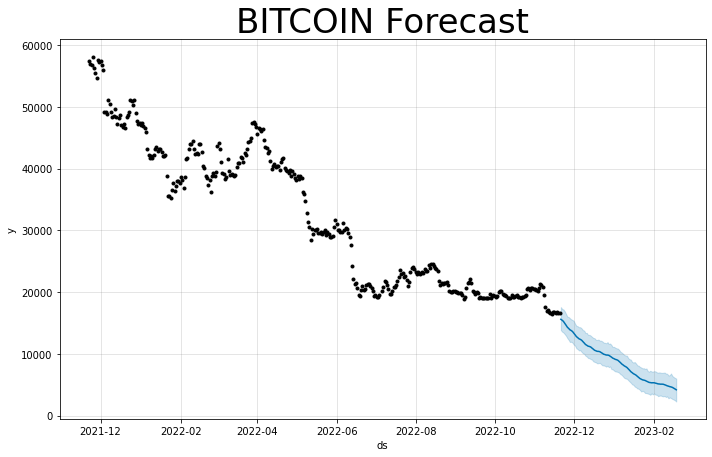

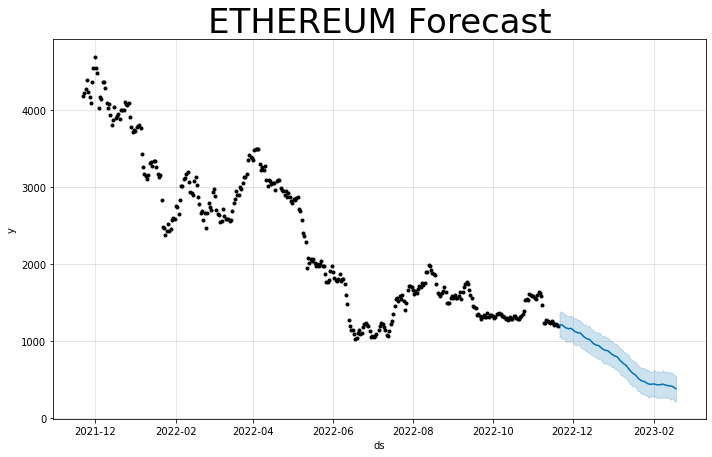

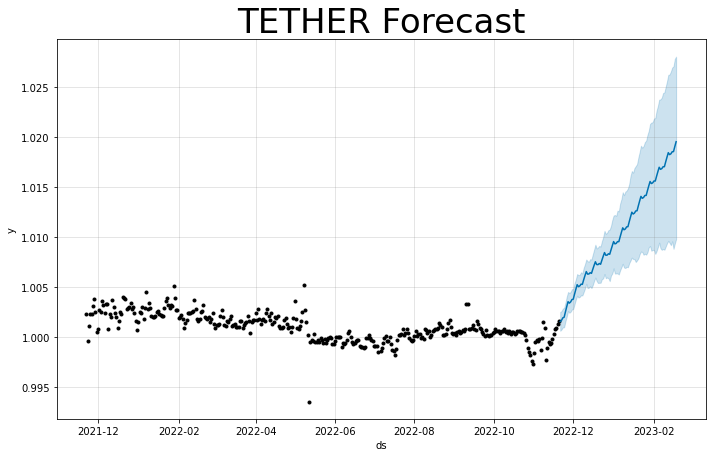

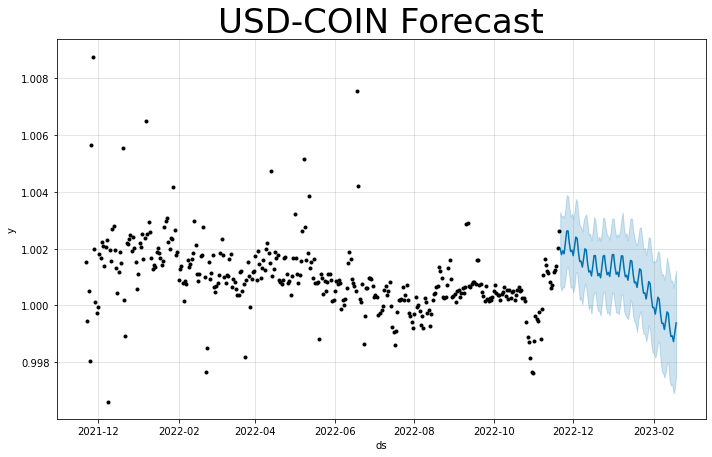

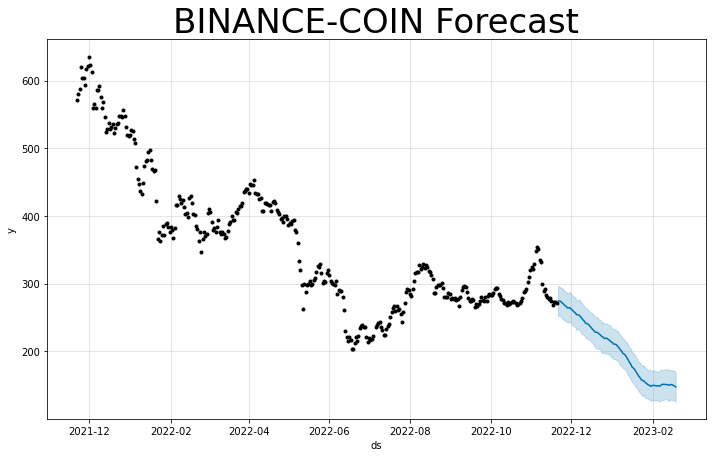

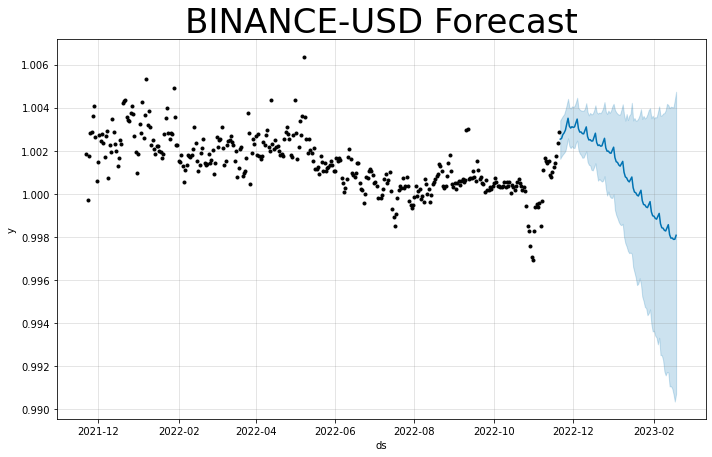

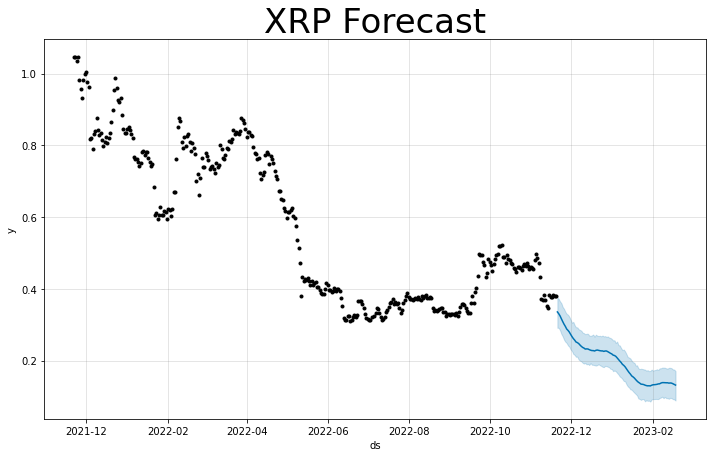

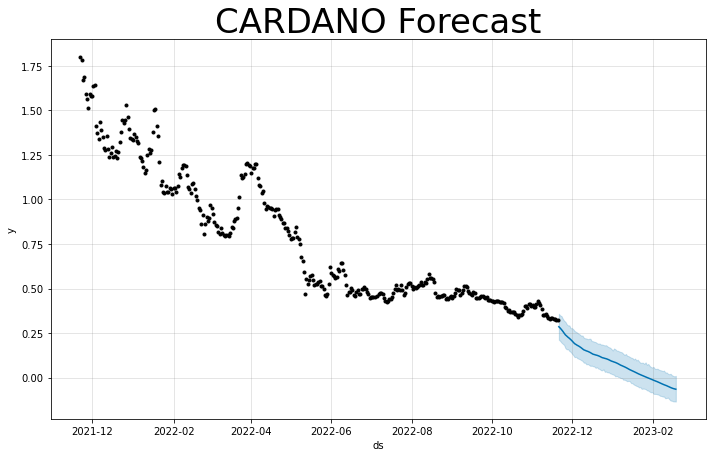

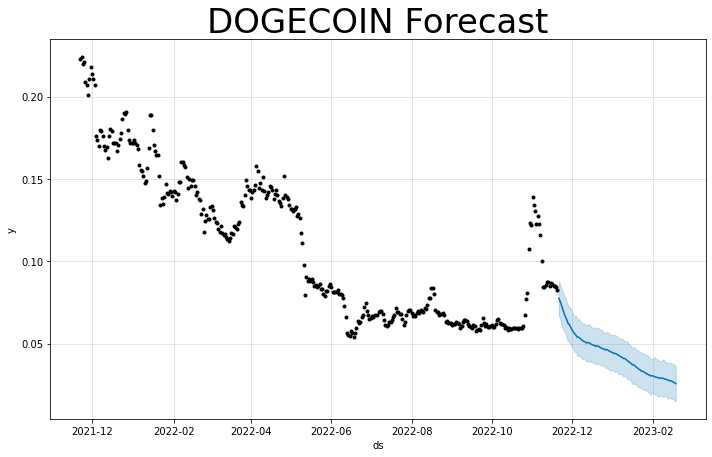

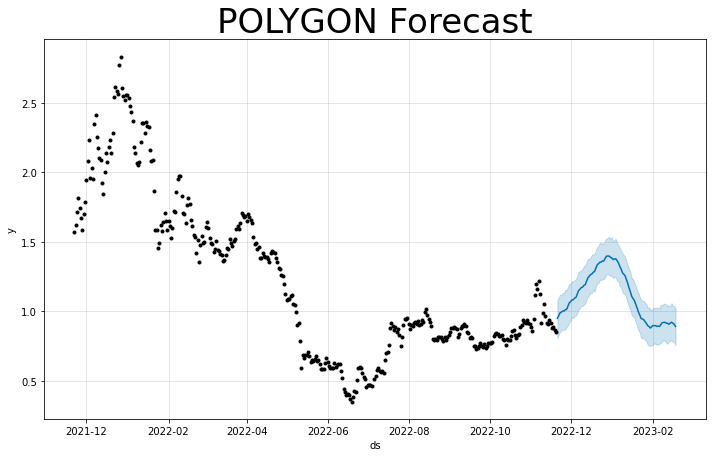

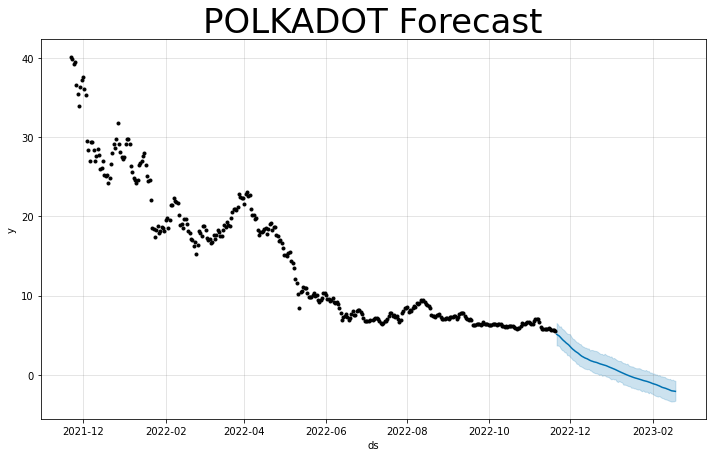

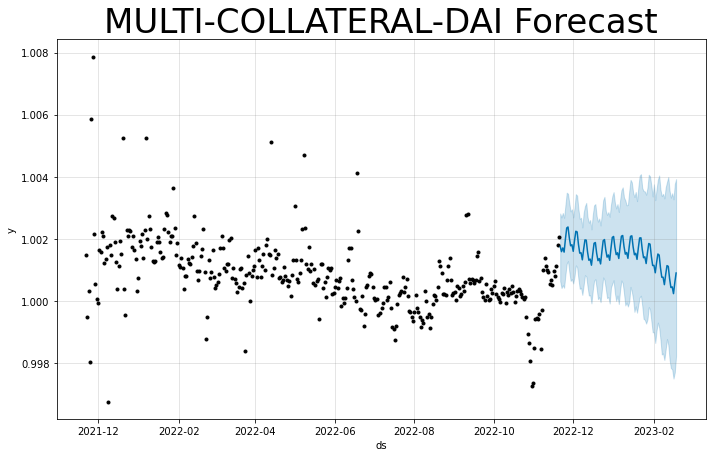

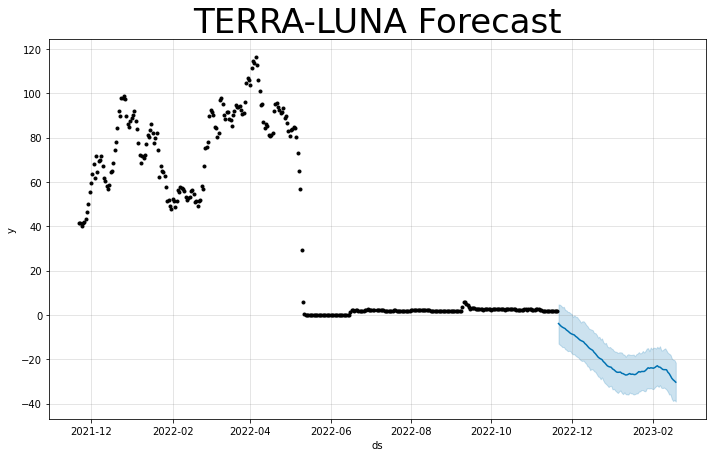

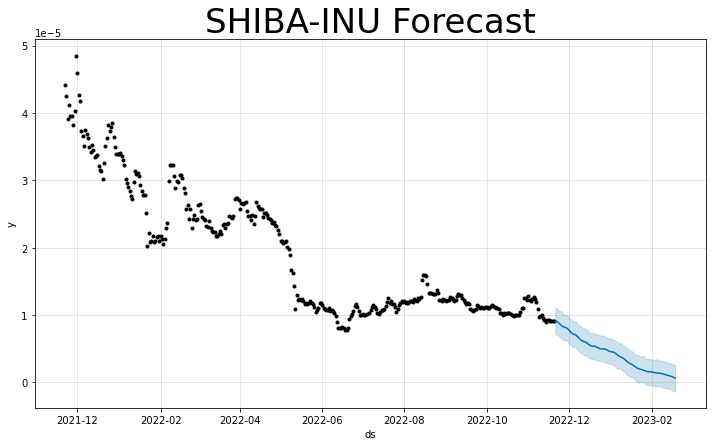

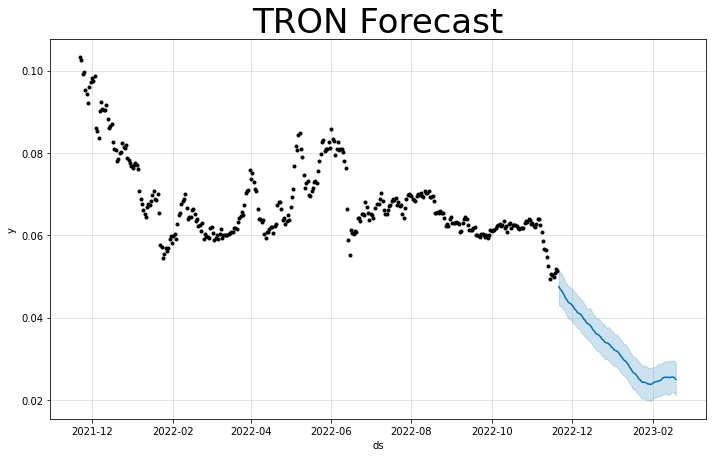

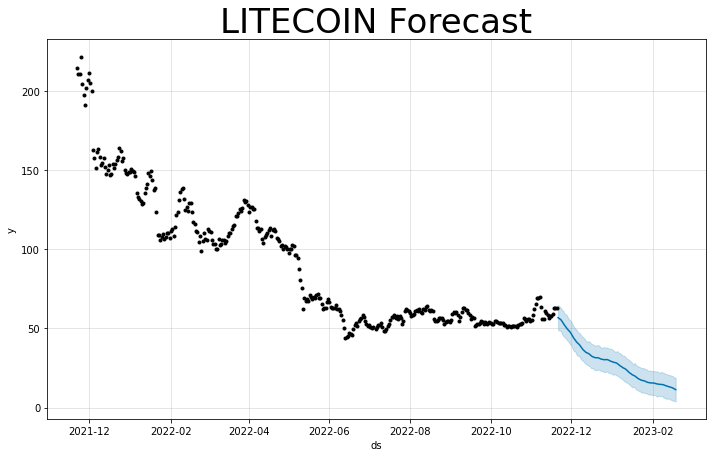

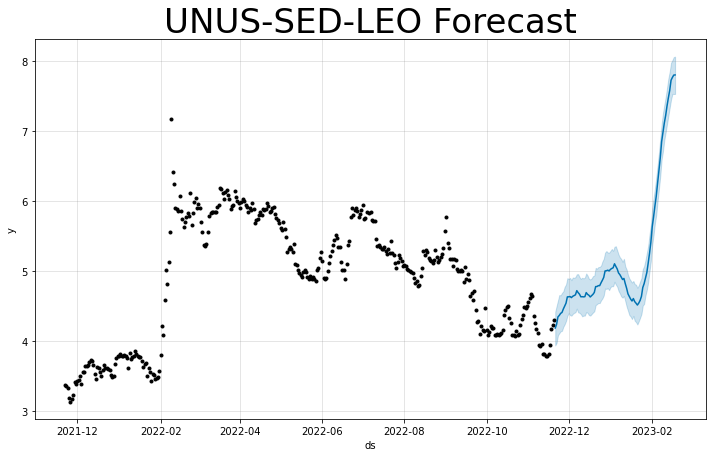

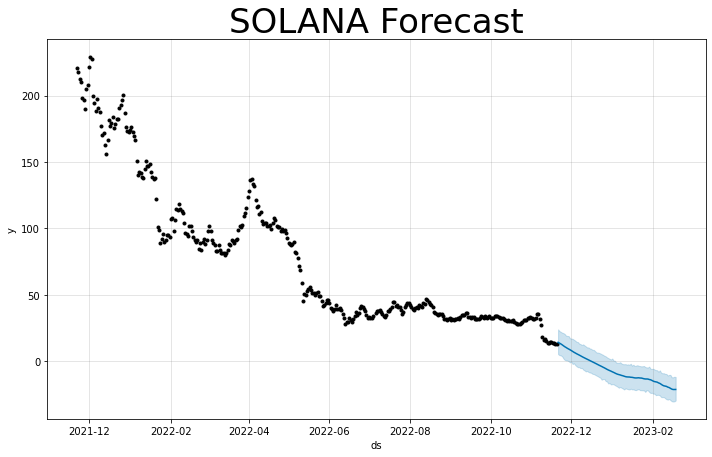

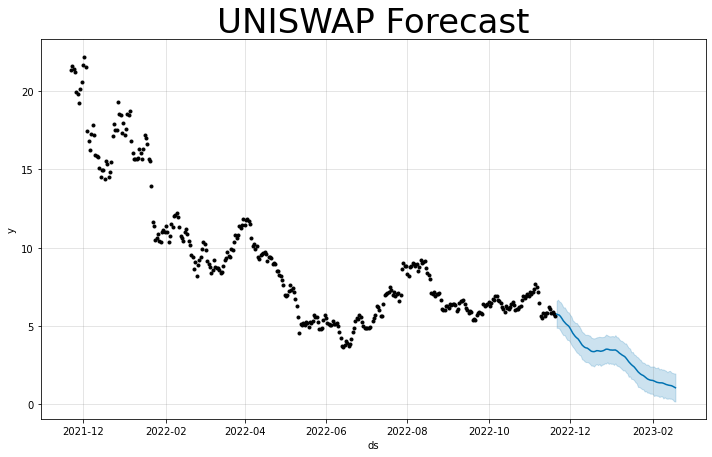

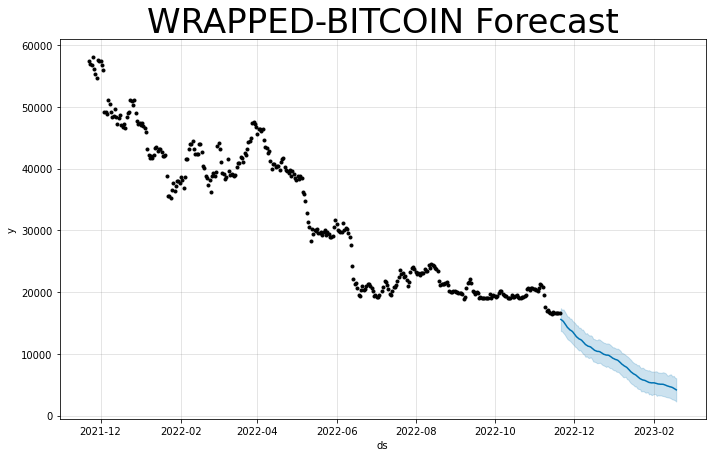

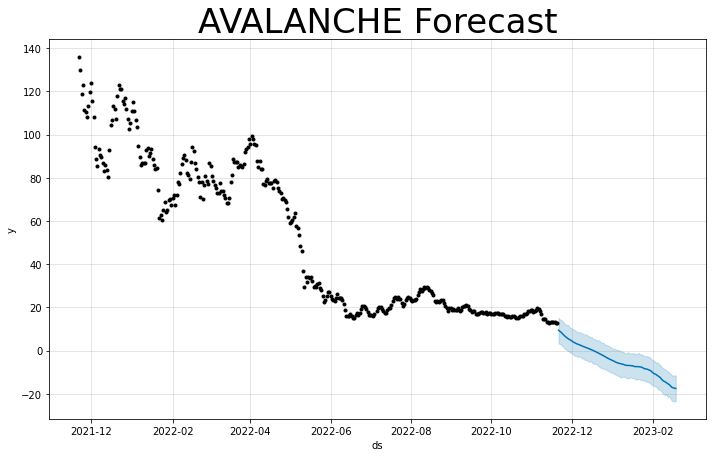

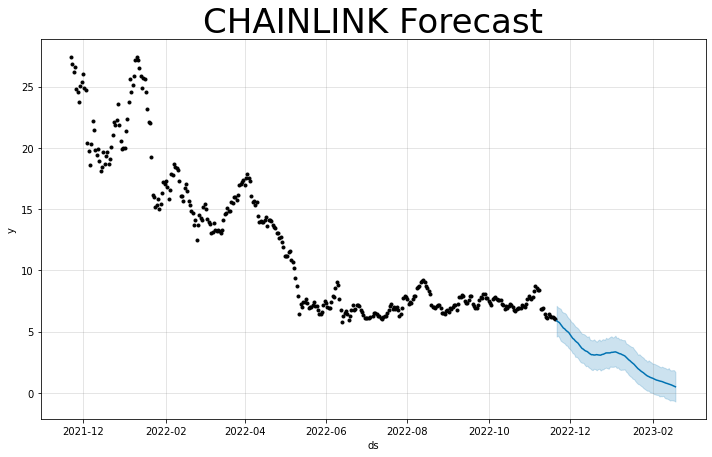

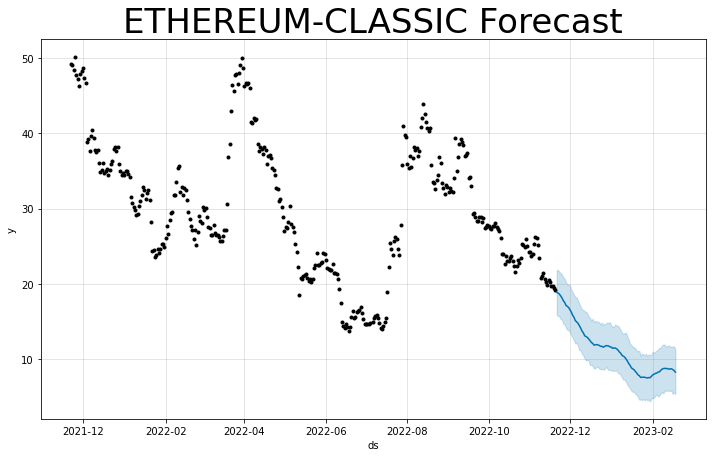

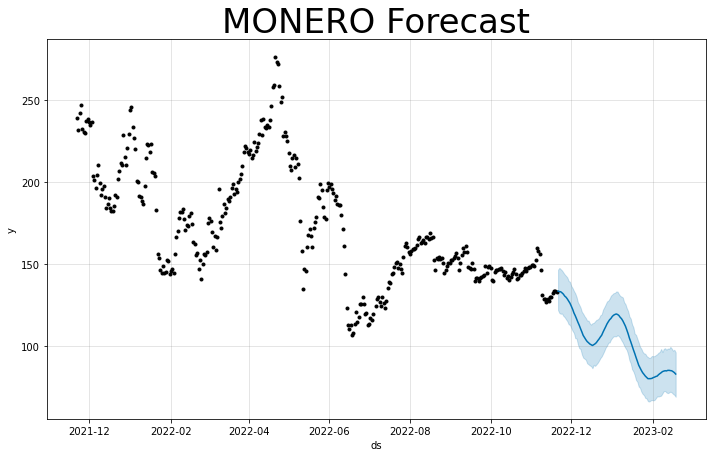

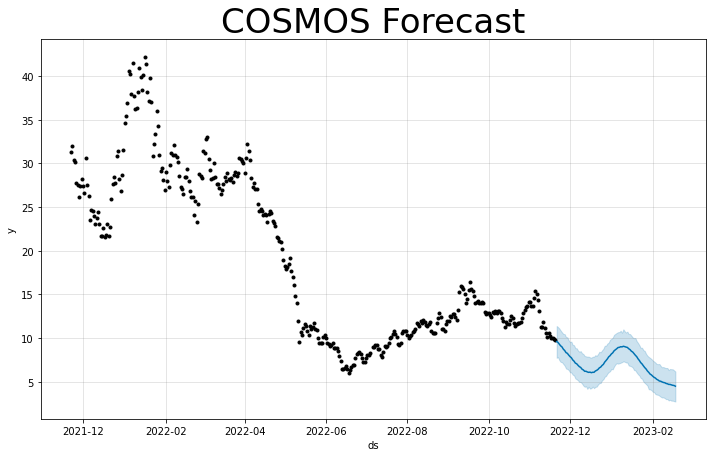

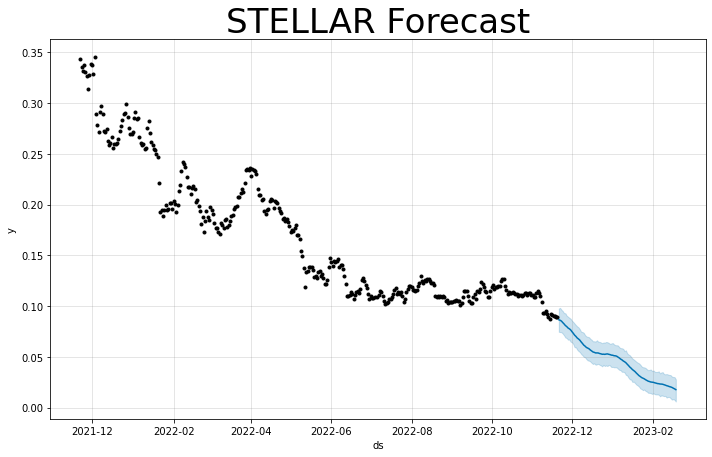

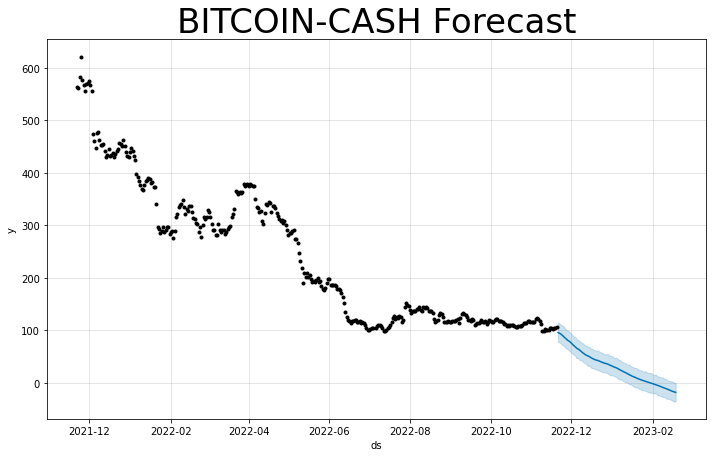

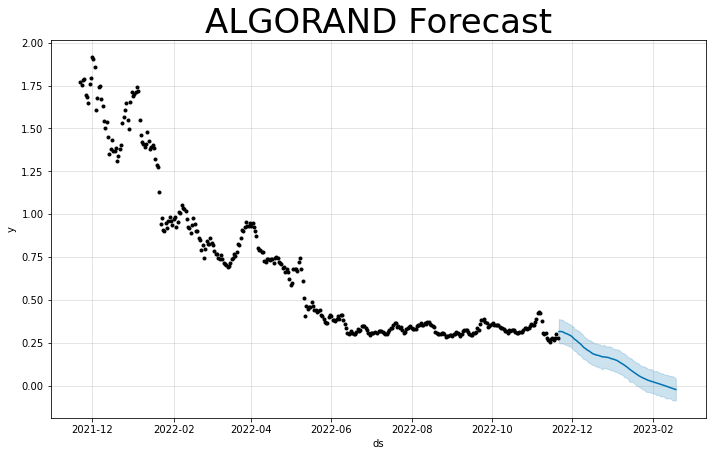

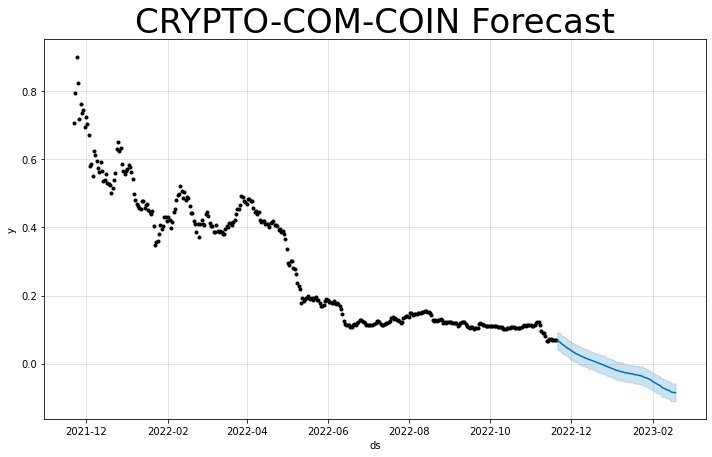

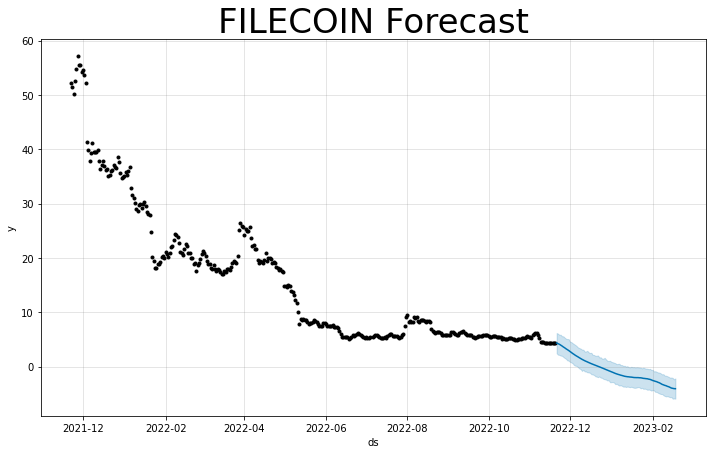

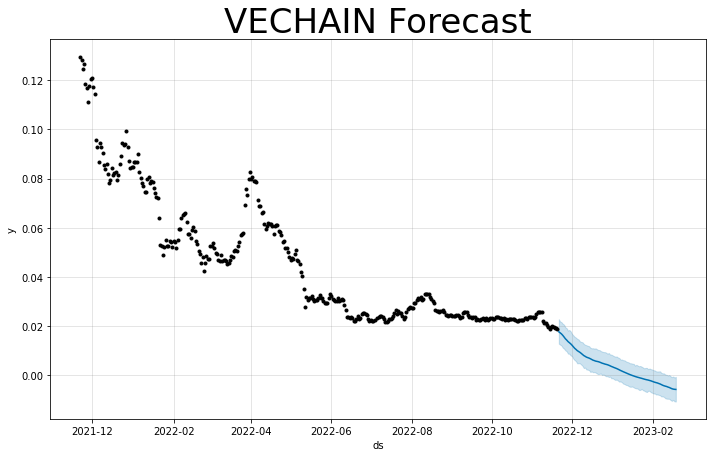

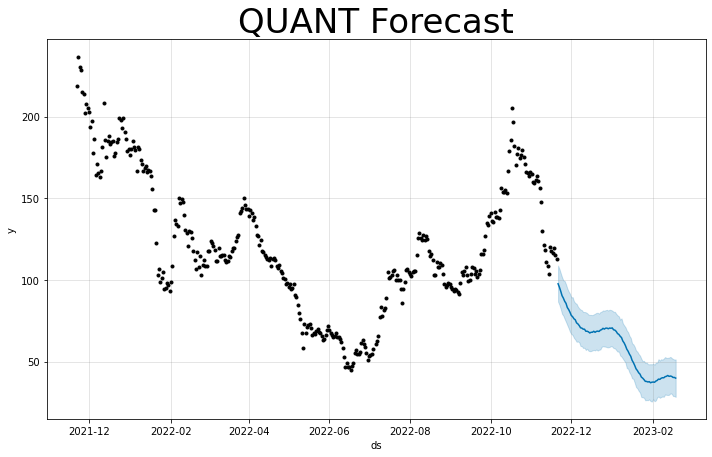

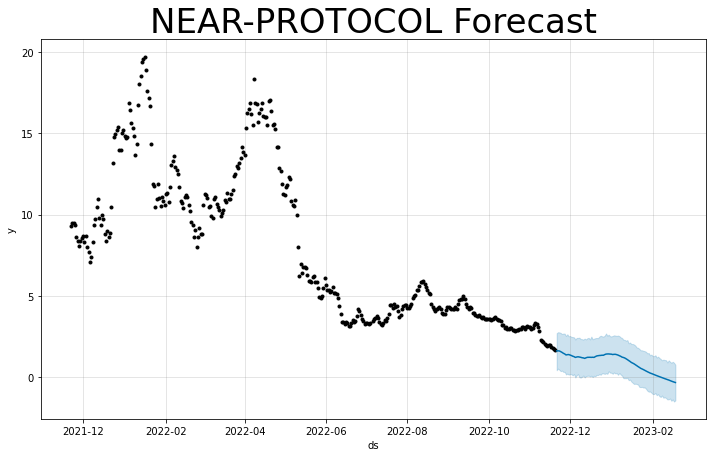

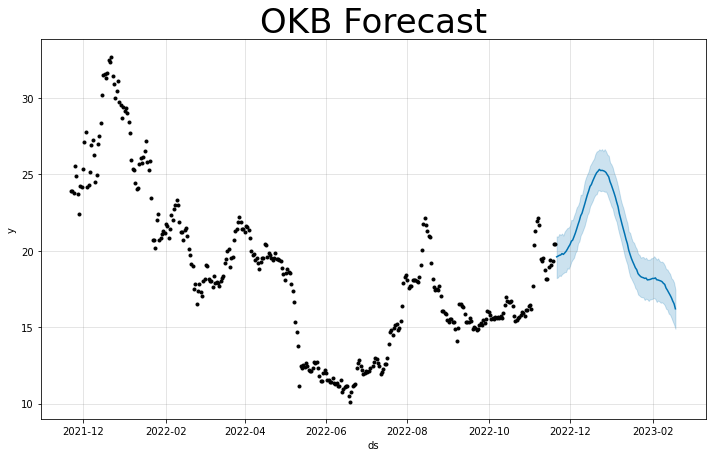

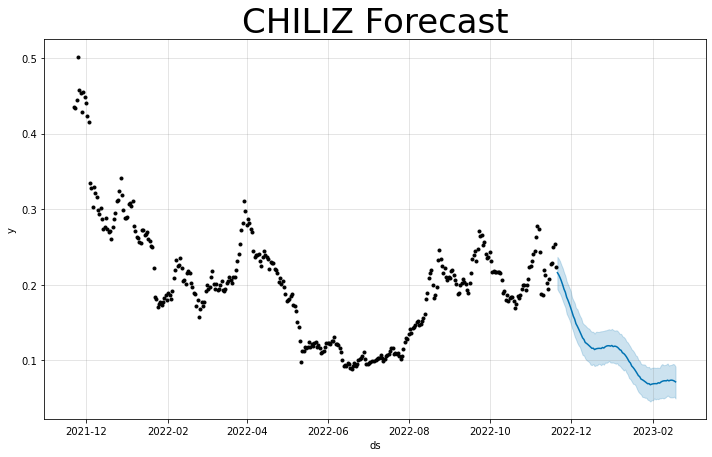

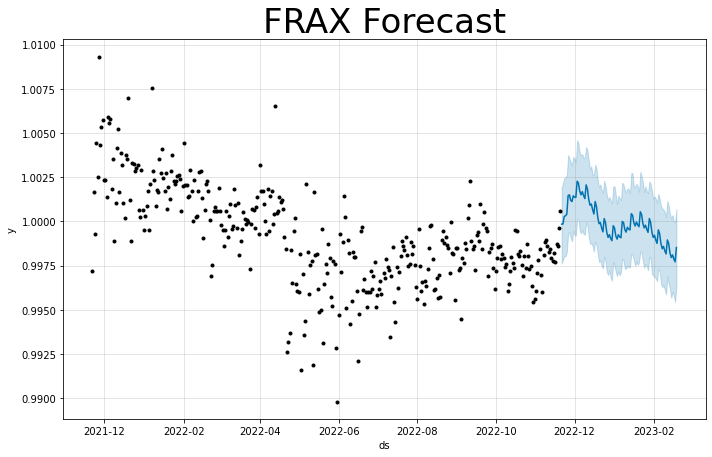

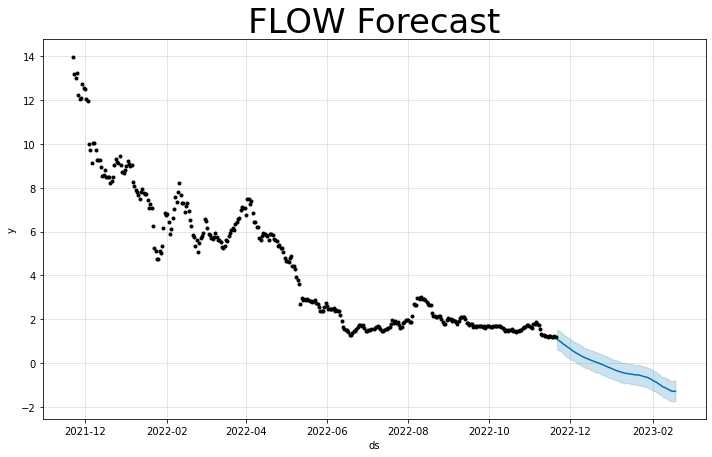

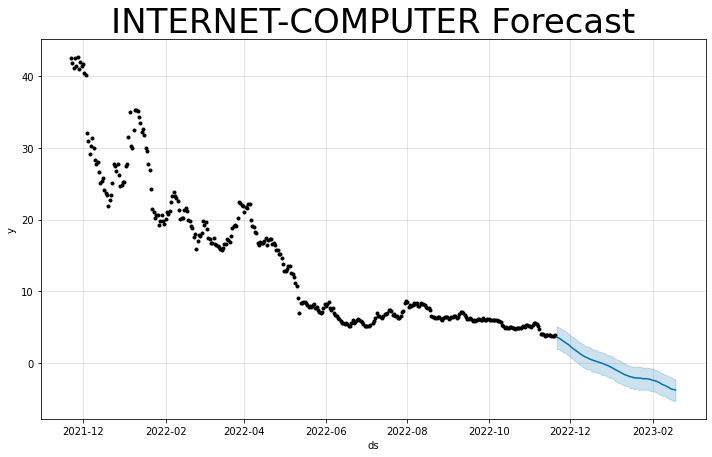

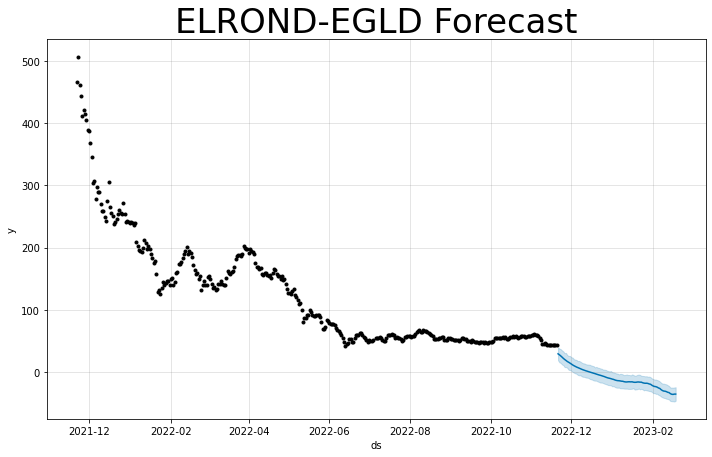

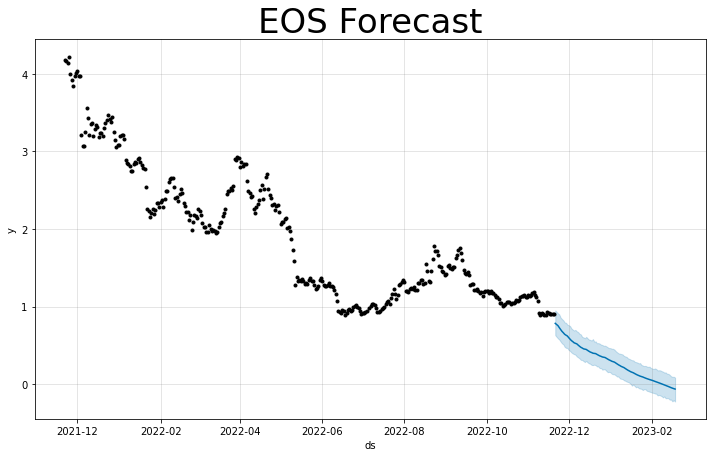

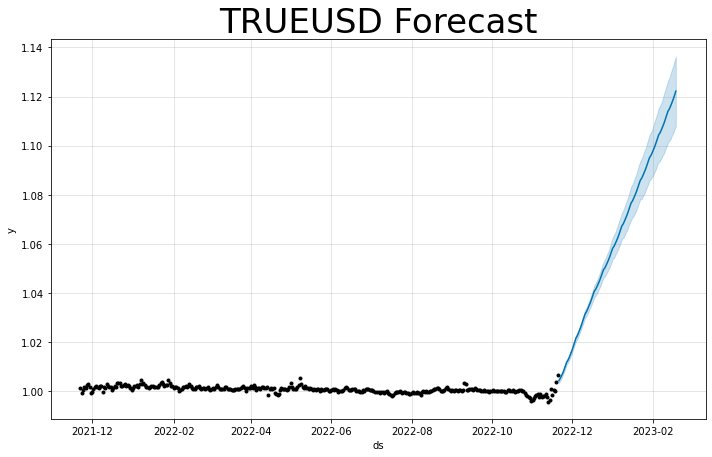

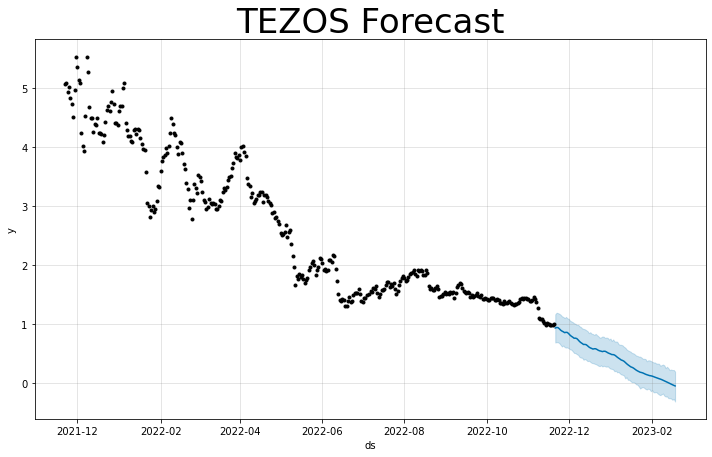

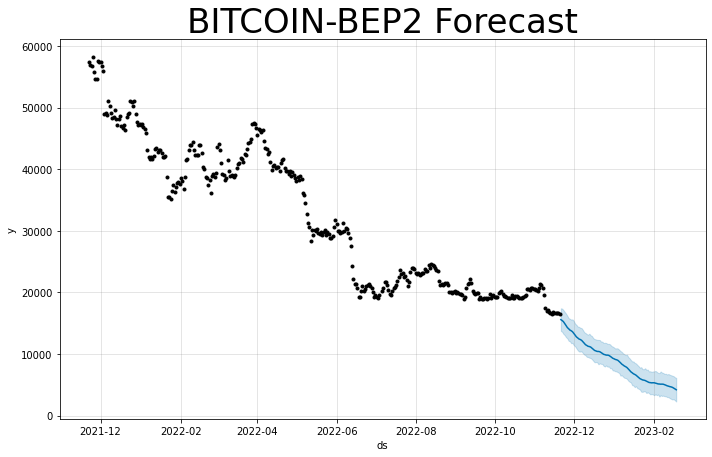

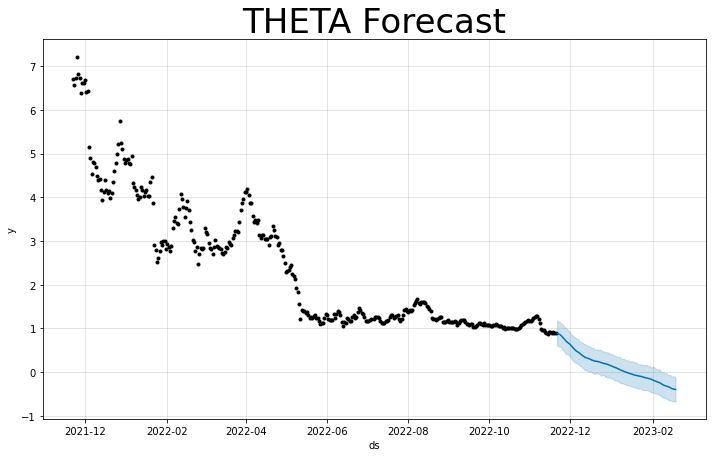

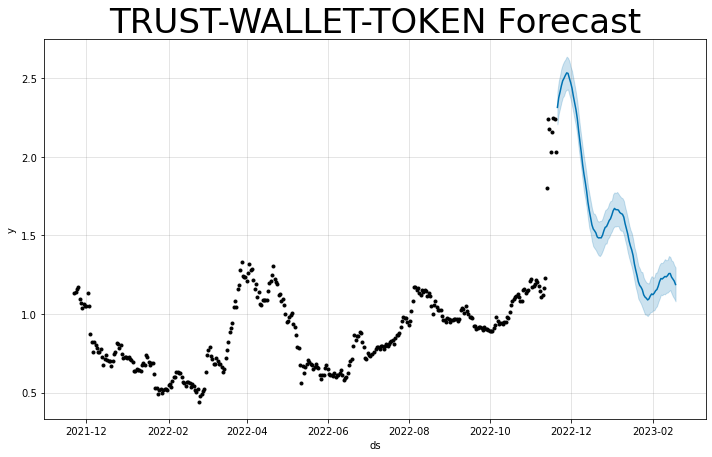

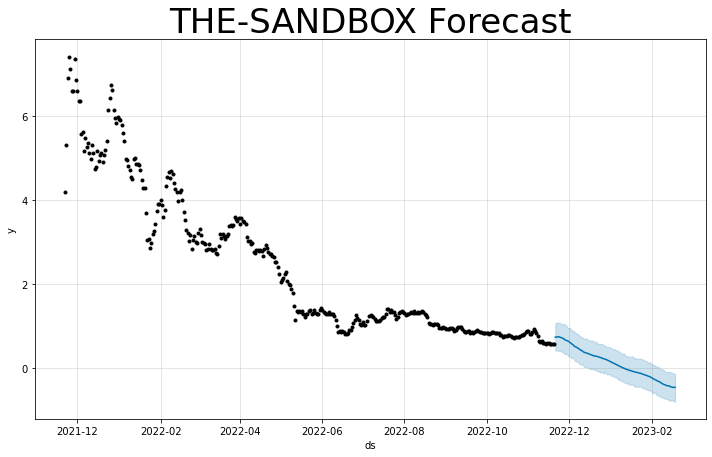

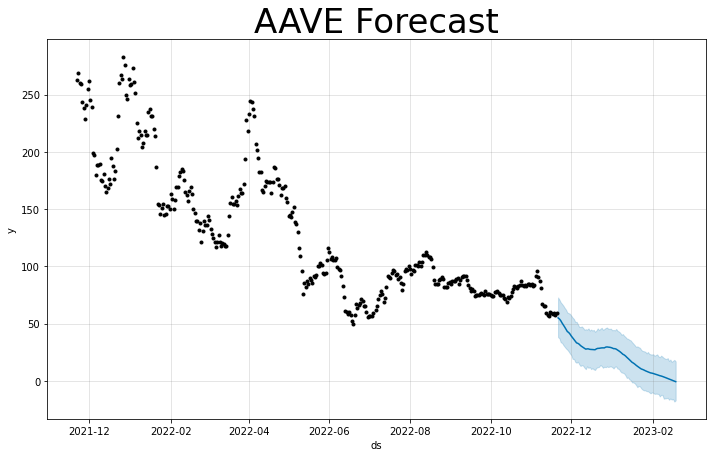

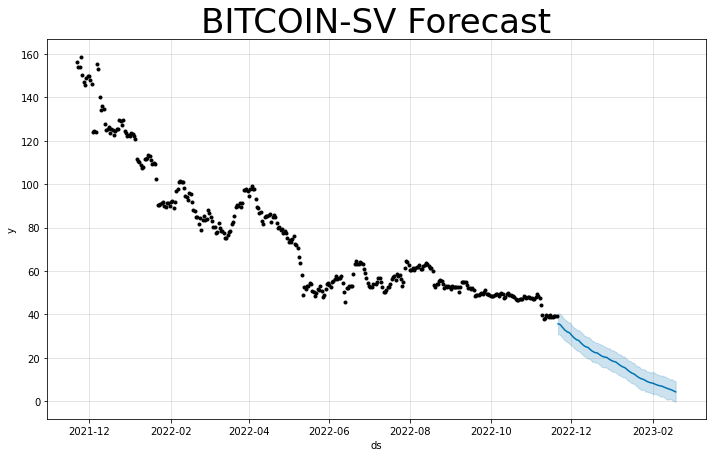

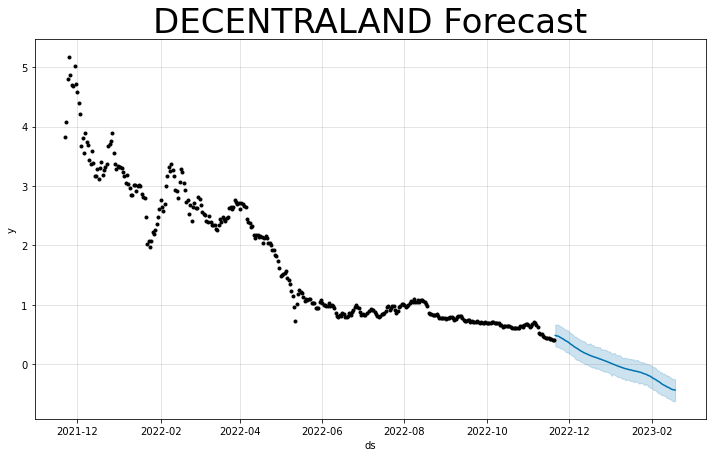

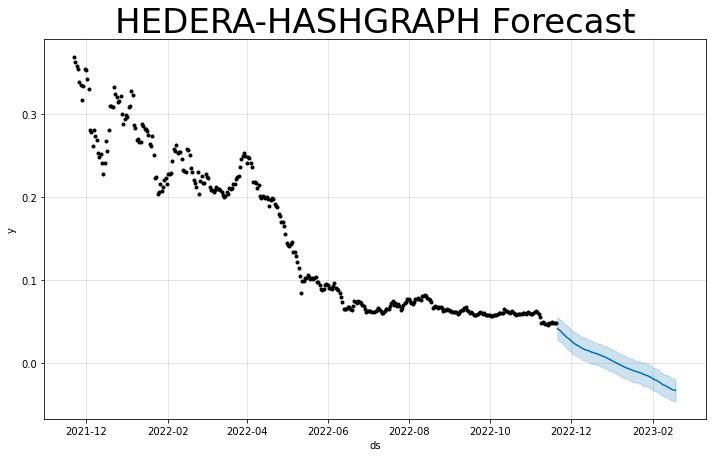

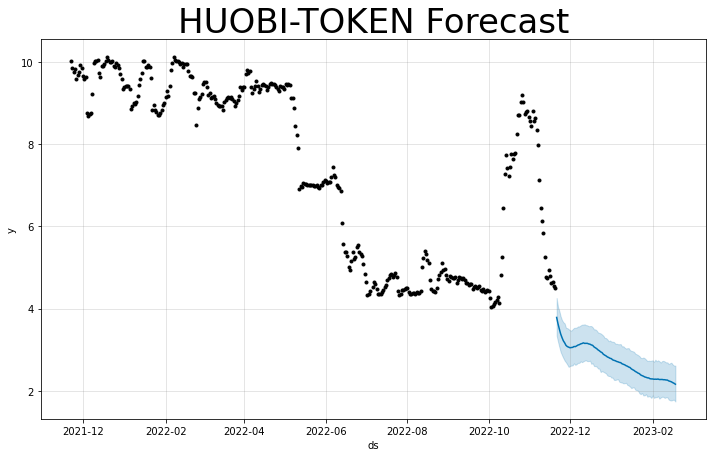

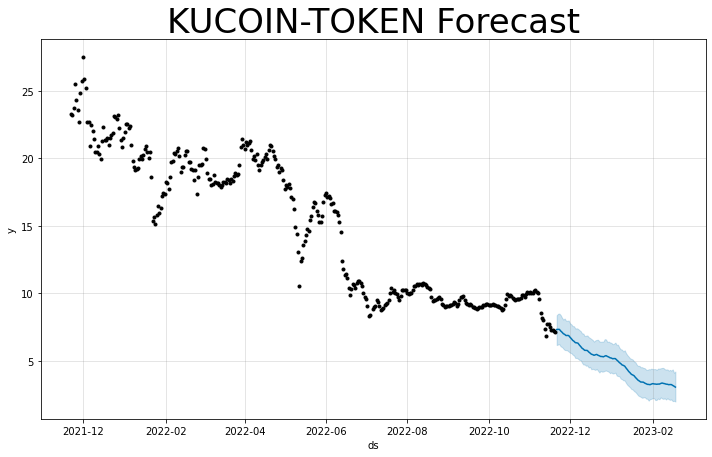

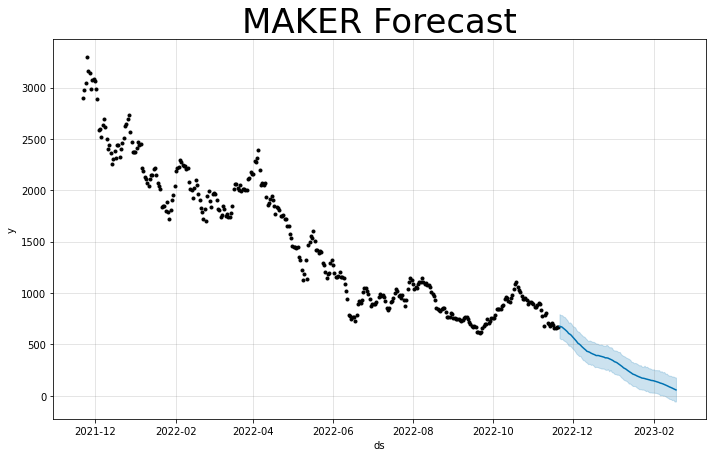

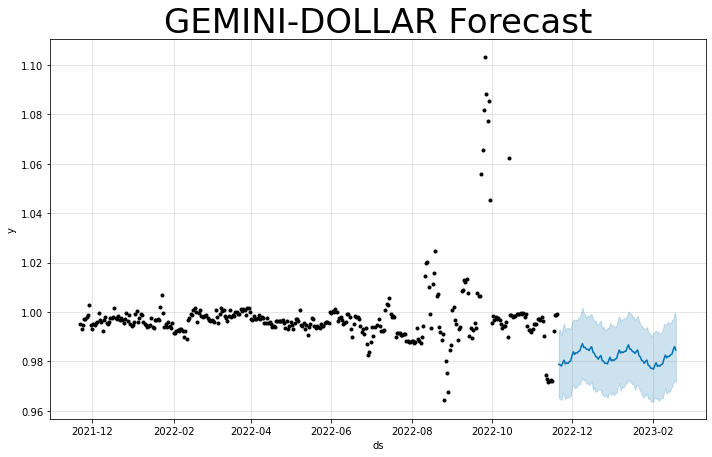

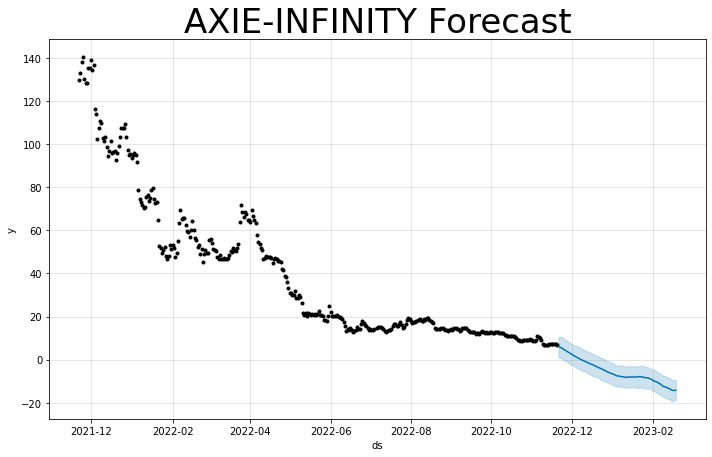

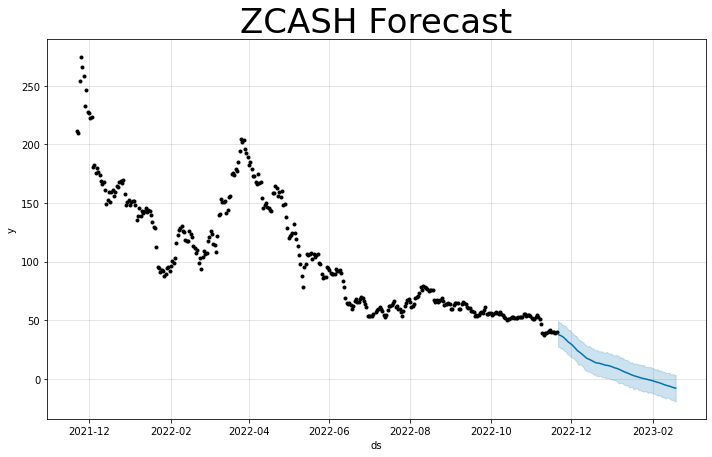

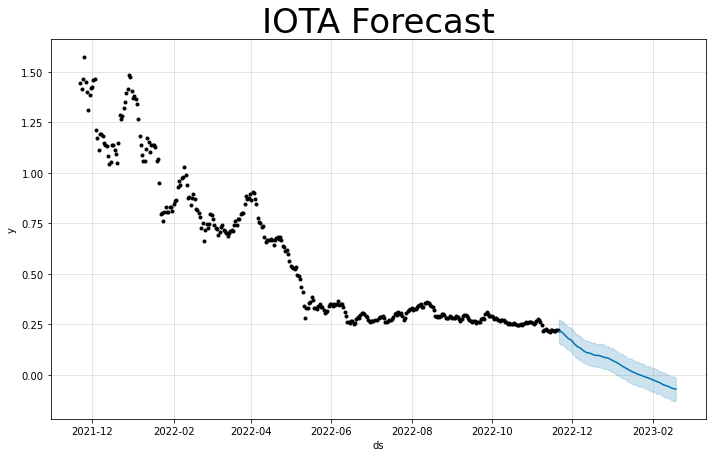

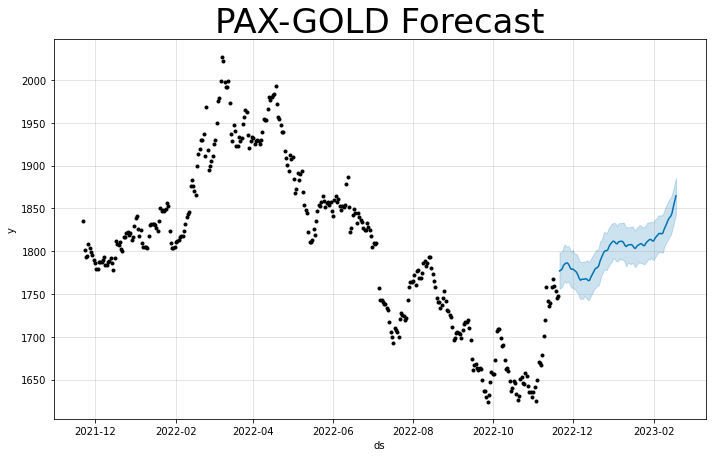

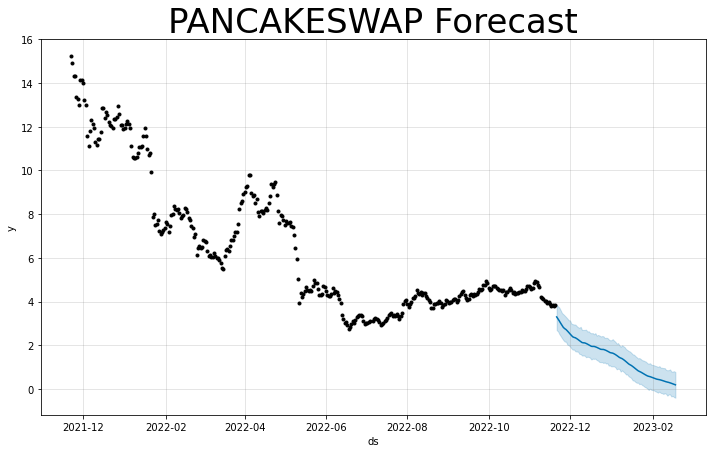

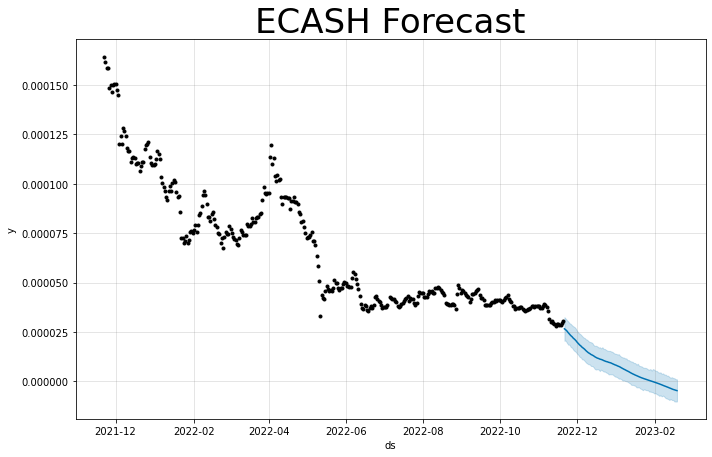

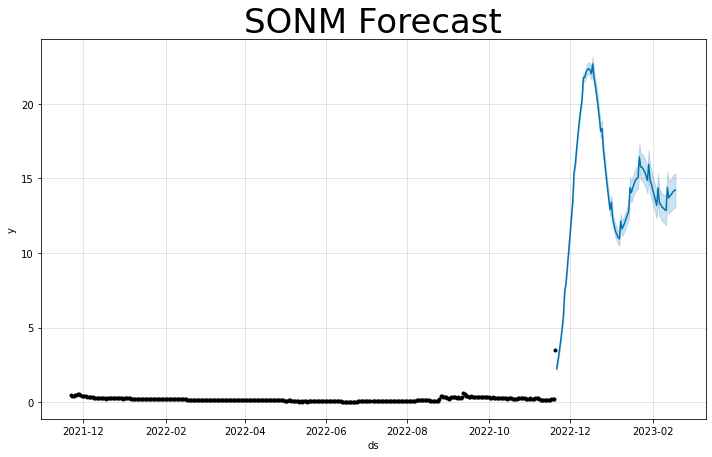

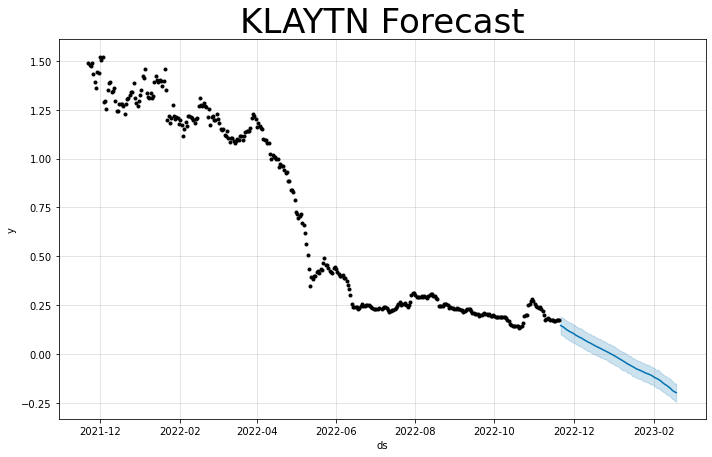

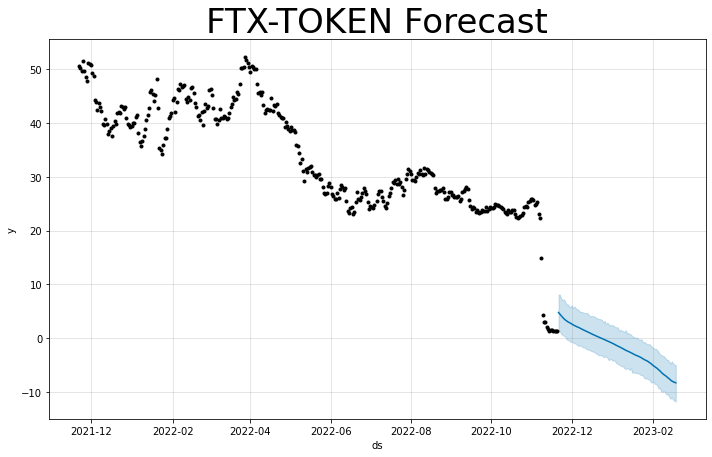

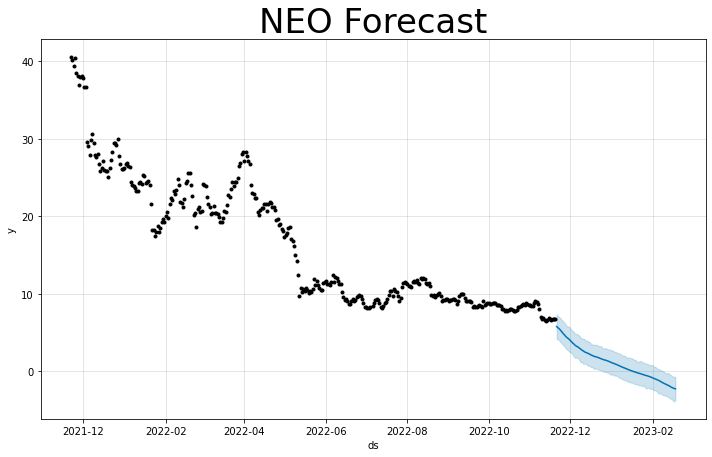

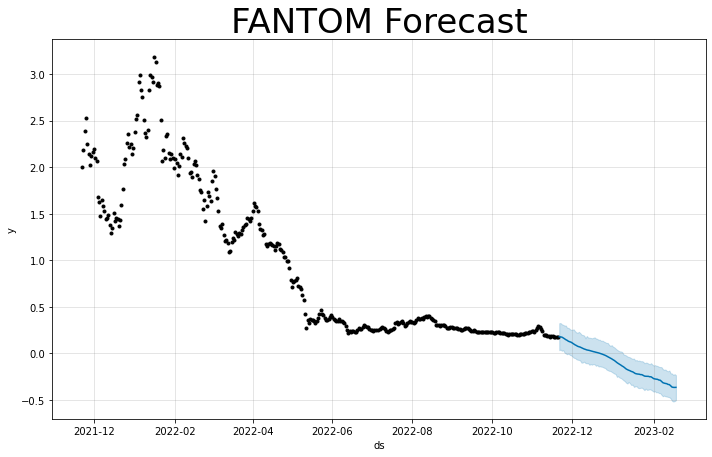

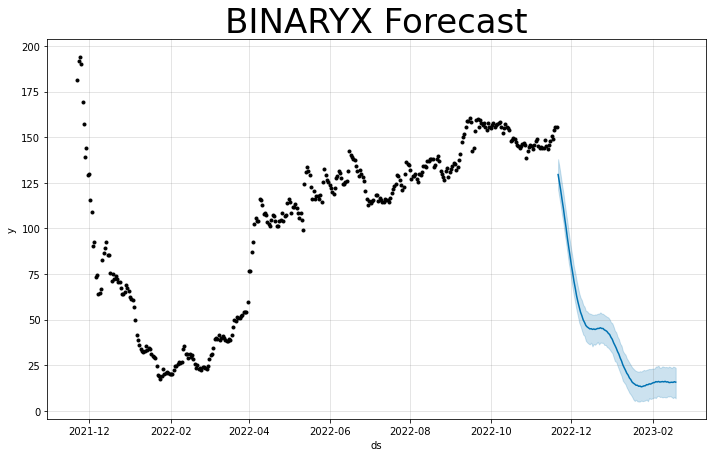

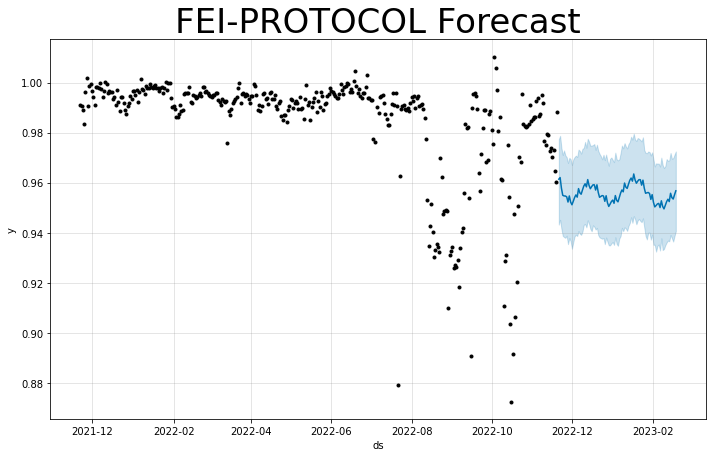

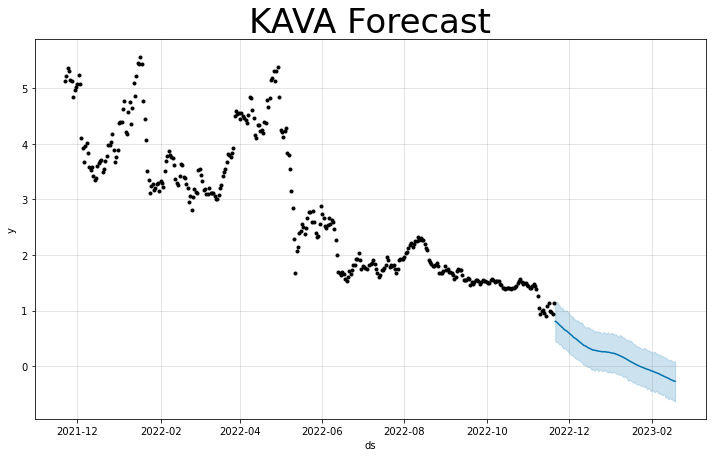

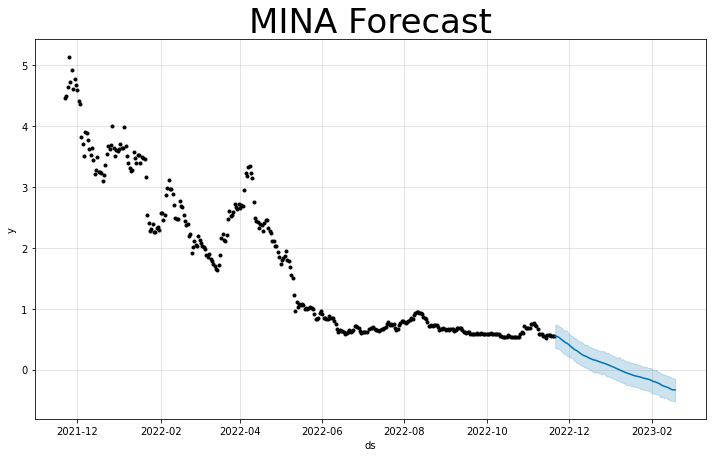

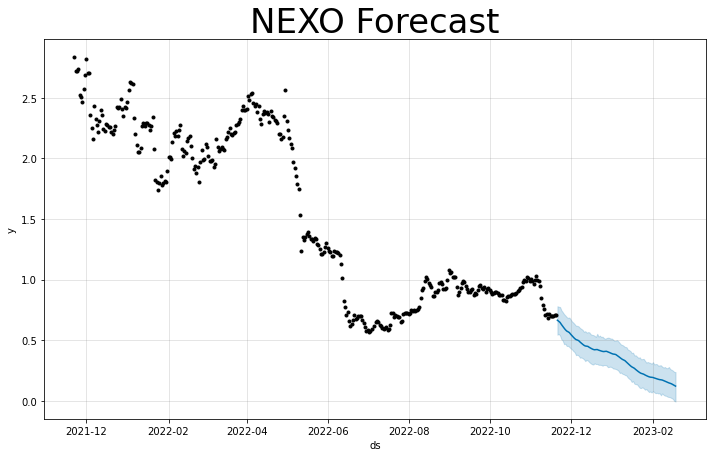

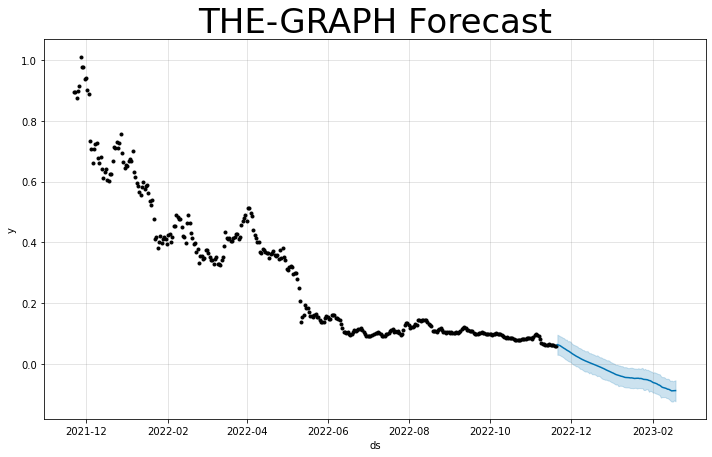

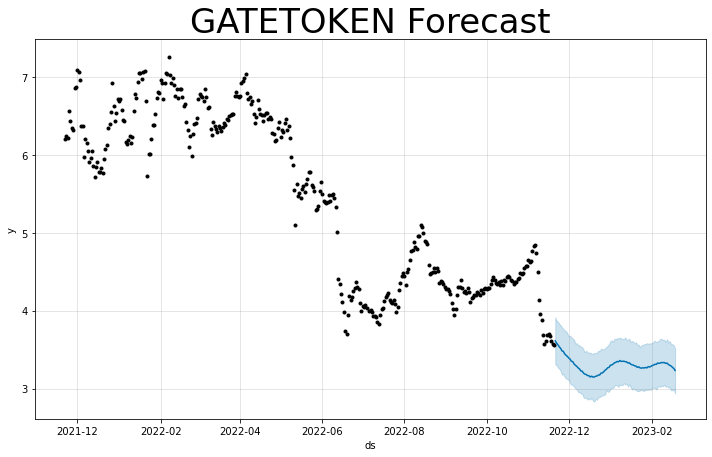

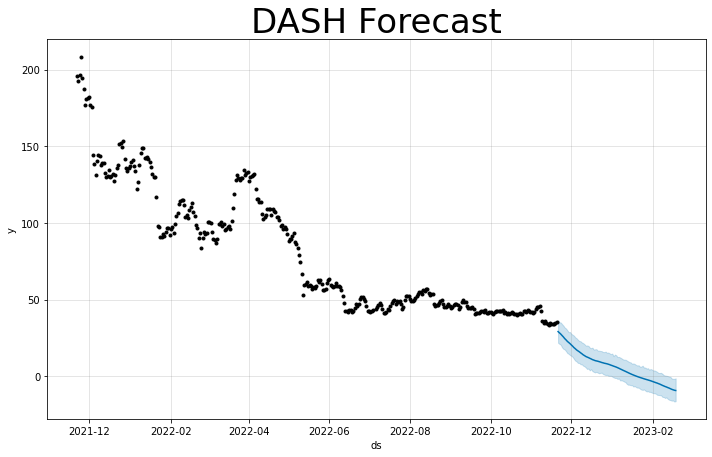

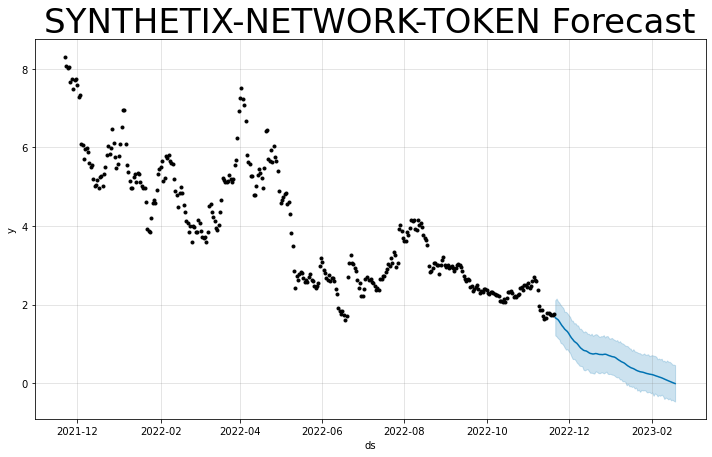

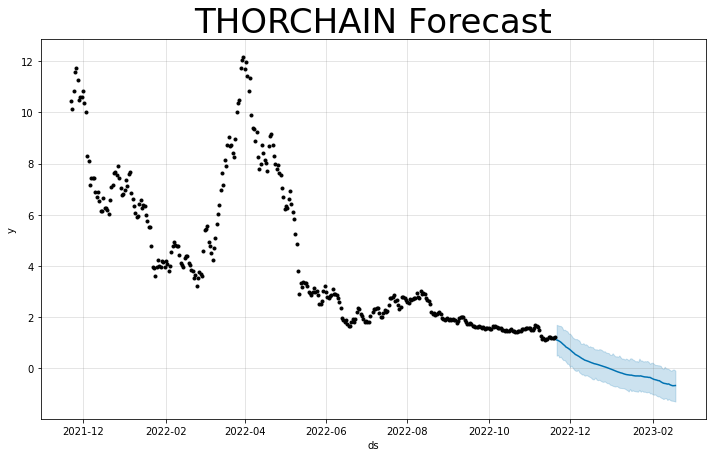

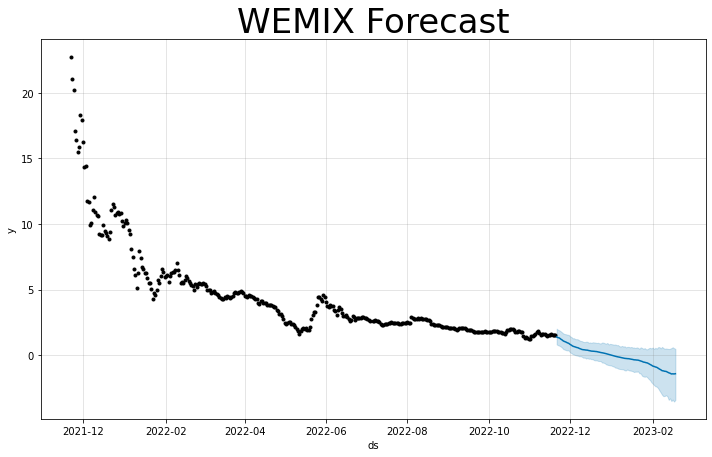

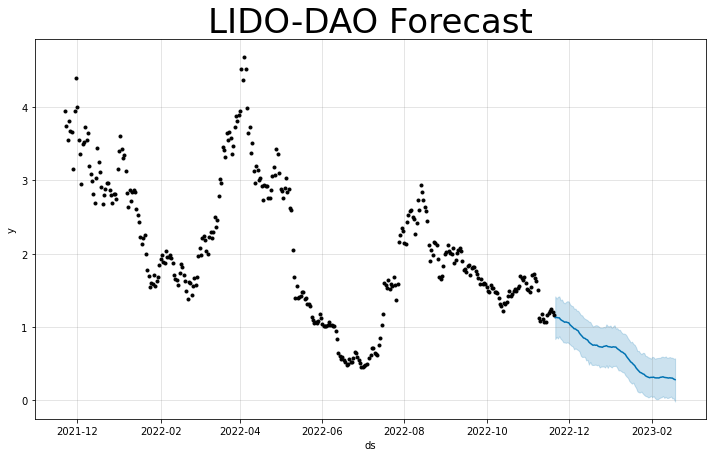

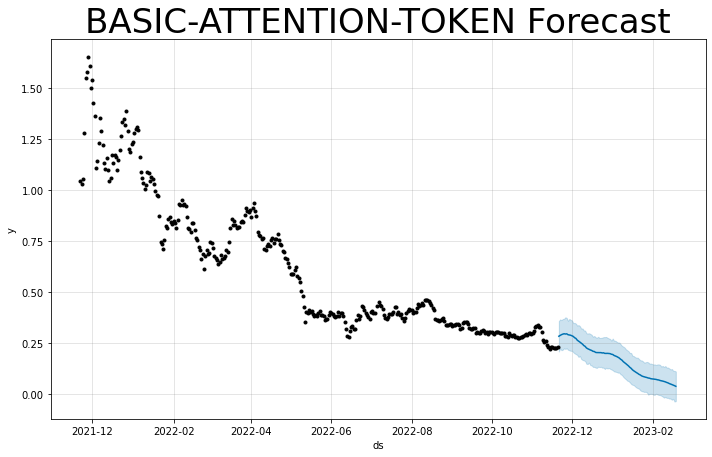

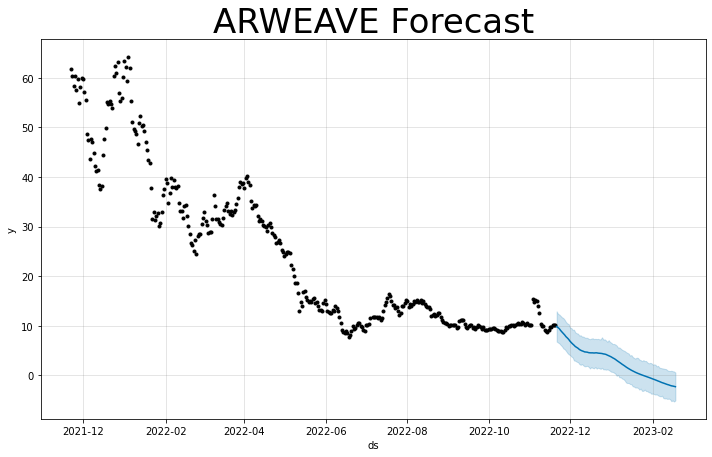

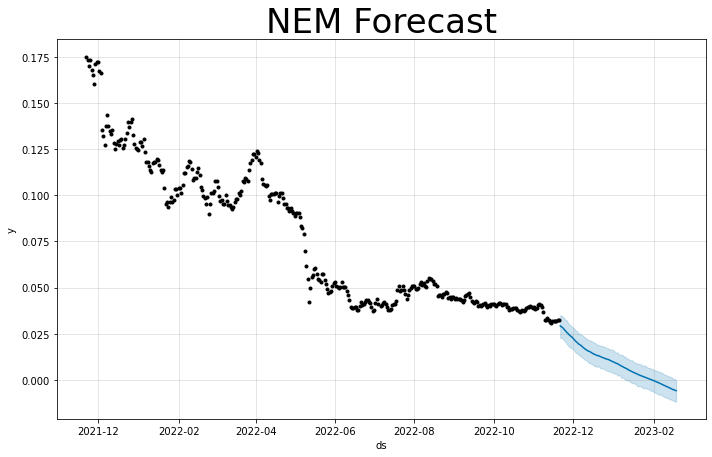

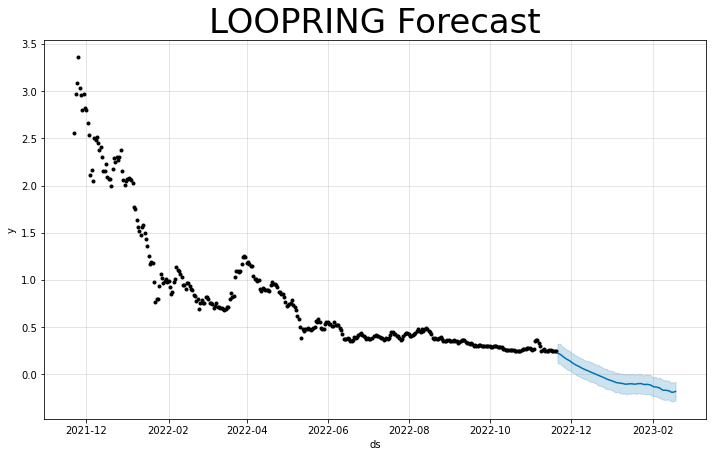

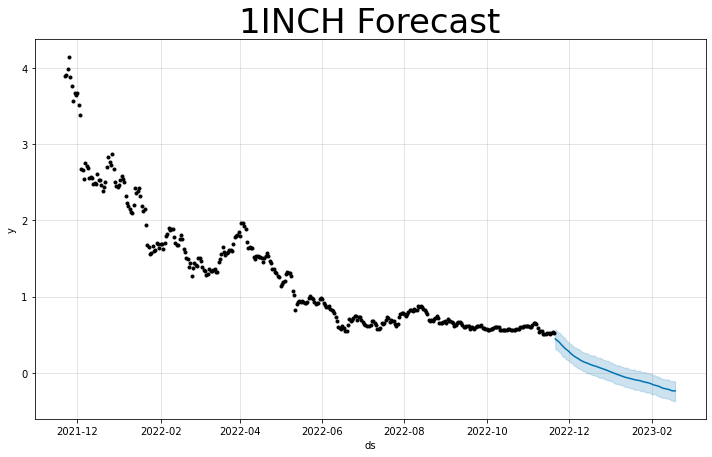

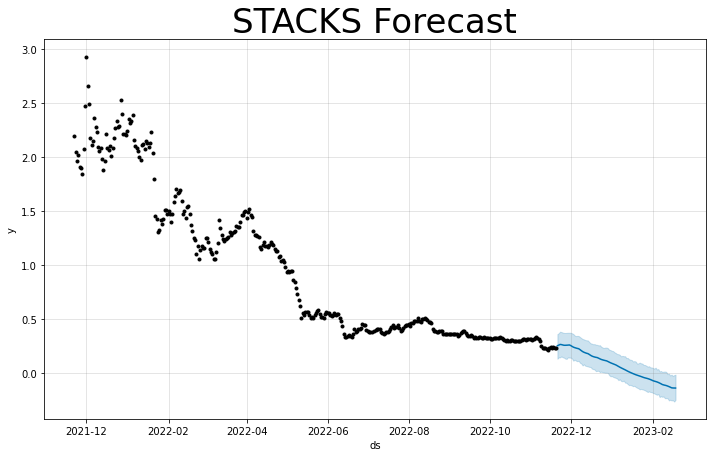

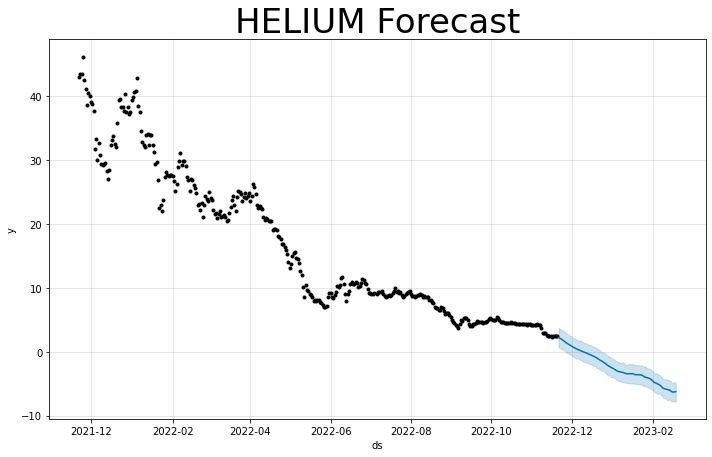

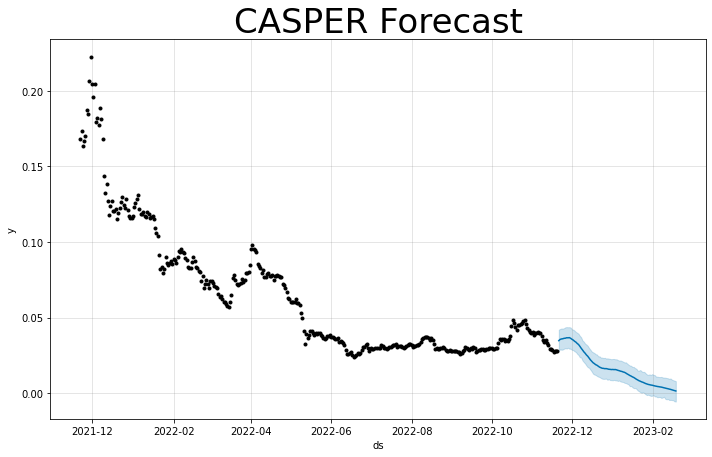

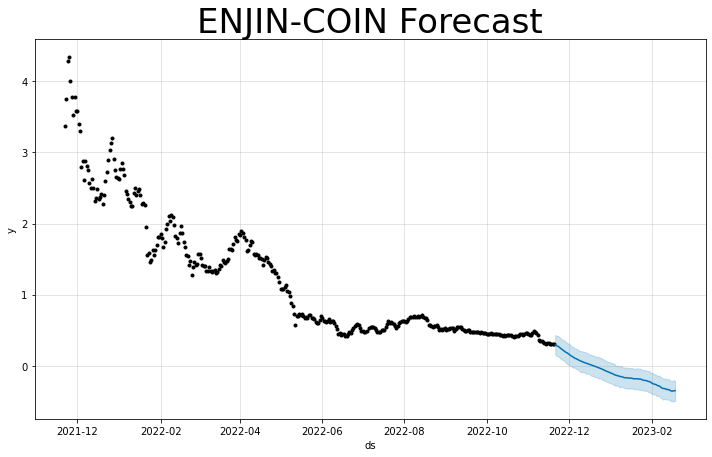

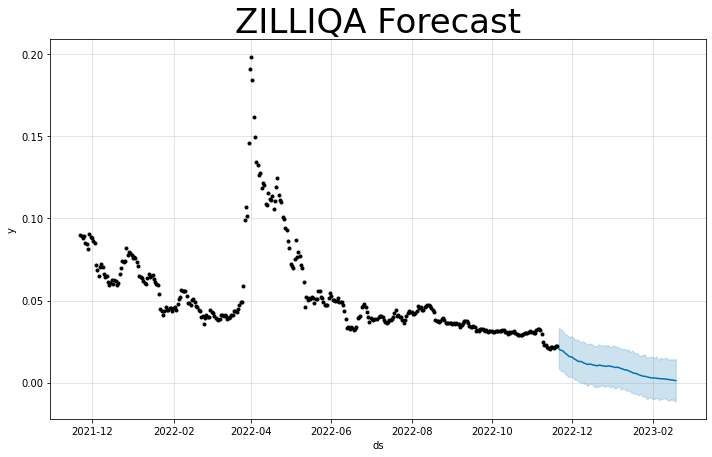

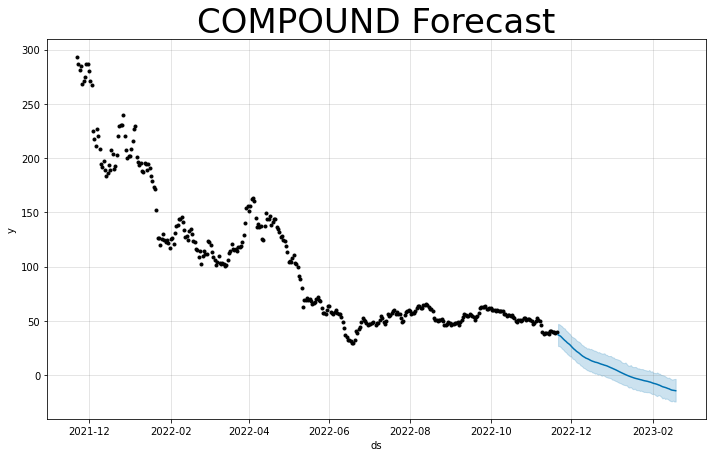

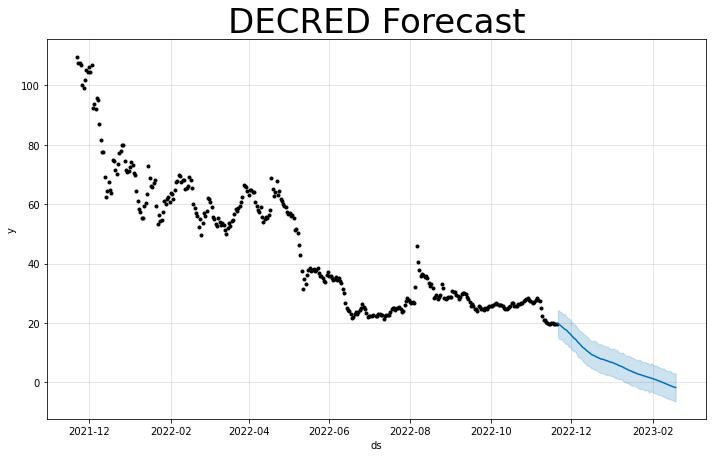

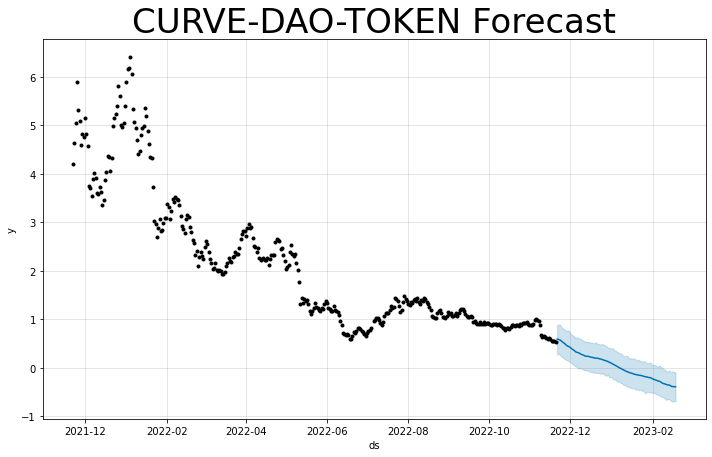

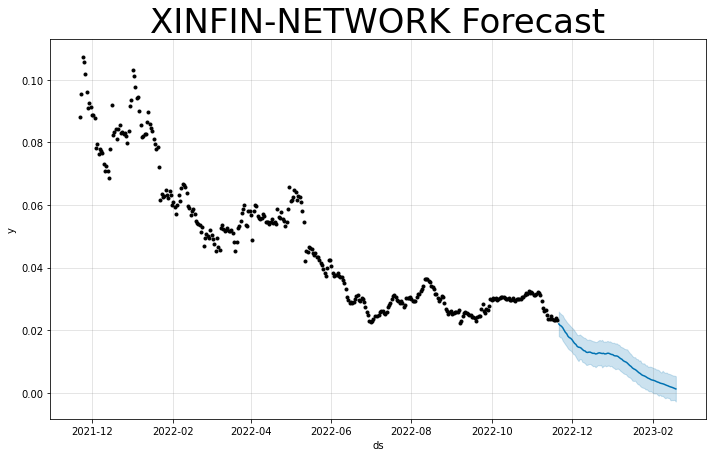

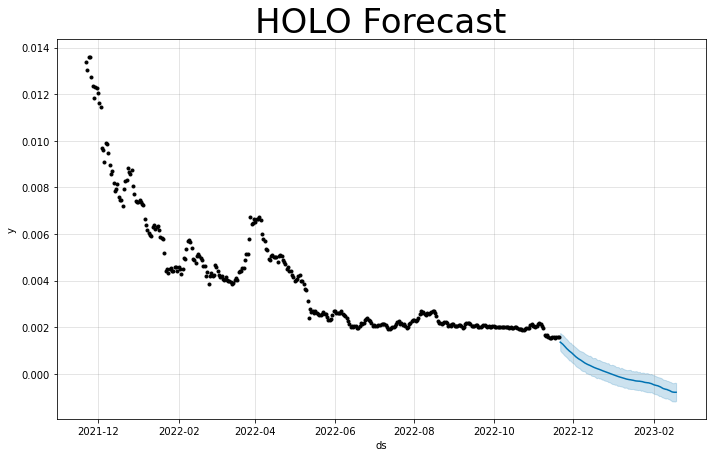

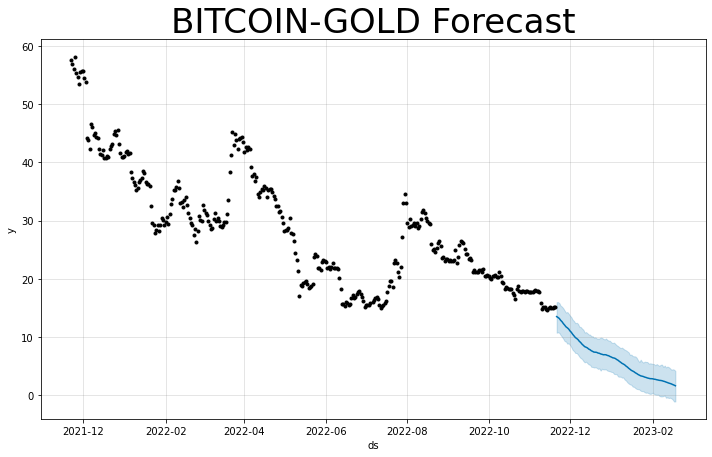

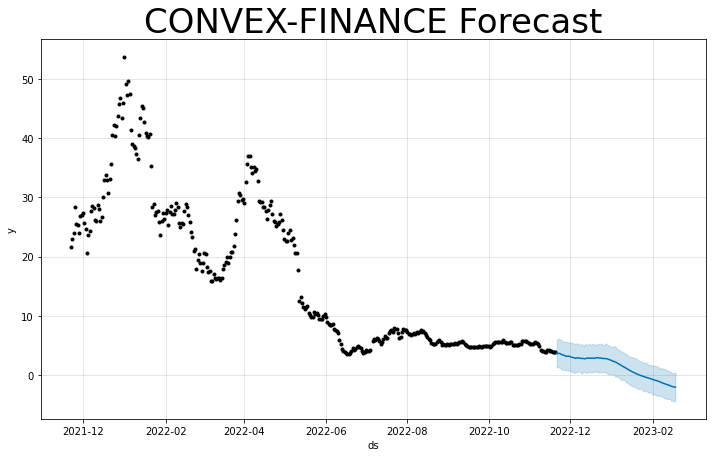

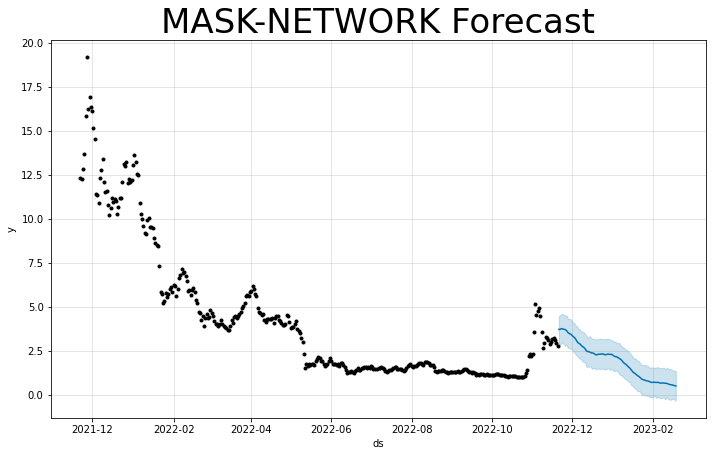

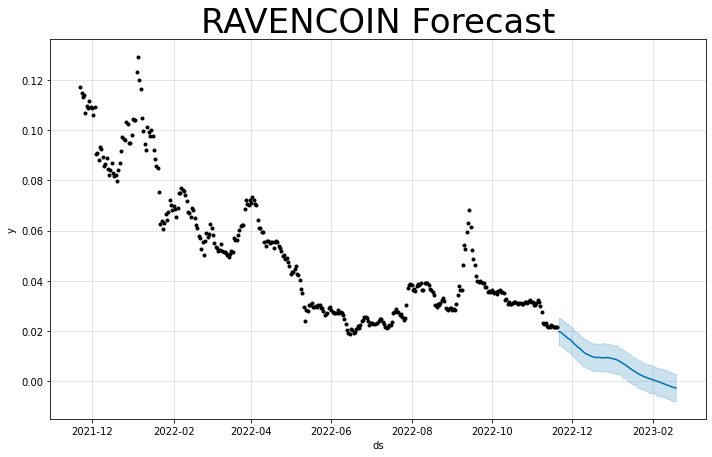

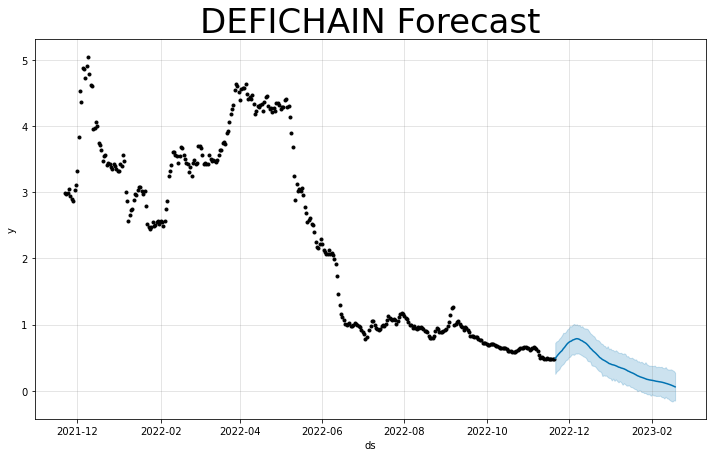

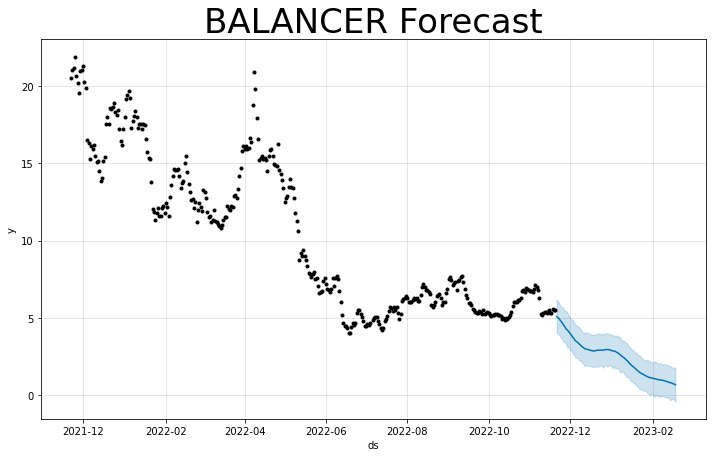

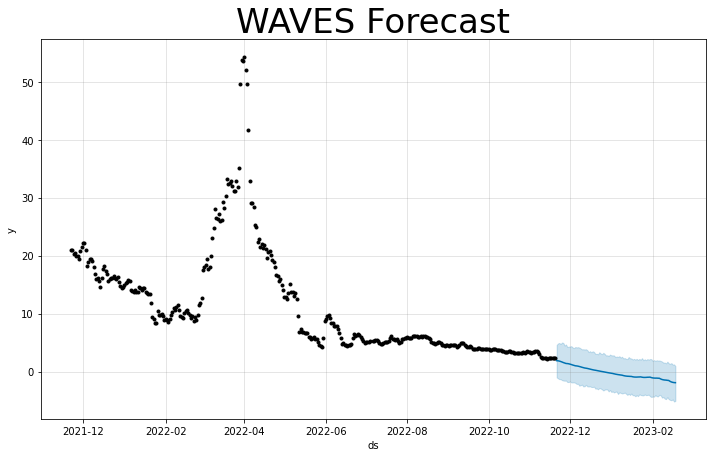

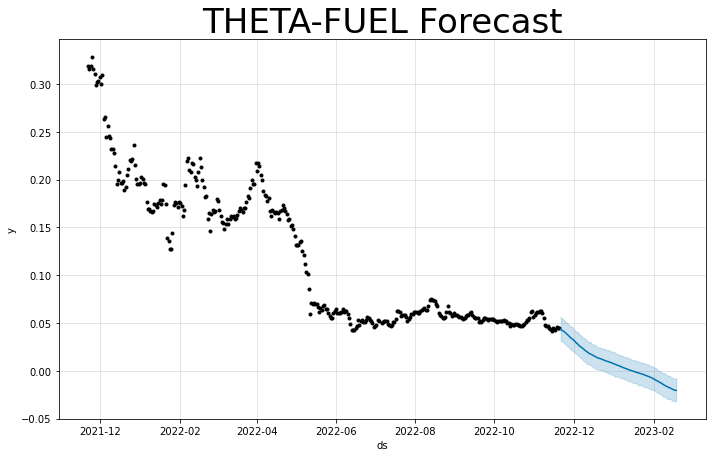

In [ ]:
#@title Run the predictions on the selected currencies
currencies = selection.value
print('Predicting ',currencies)
forecasts = predict_currencies(selection.value)